# Lead Scoring Case Study
## Participants: Naveen Mani || Janarthanan Mani

### Problem Statement
An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone. A typical lead conversion process can be represented using the following funnel:

### Lead Conversion Process - Demonstrated as a funnel
As you can see, there are a lot of leads generated in the initial stage (top) but only a few of them come out as paying customers from the bottom. In the middle stage, you need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating etc. ) in order to get a higher lead conversion.

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

### Goals of the Case Study
There are quite a few goals for this case study.

Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.
There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.

## Step 1: Import Libraries

In [1]:
# Importing the required libraries & Filtering out the warnings

import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

##  Step 2: Load the data into dataframe

In [2]:
# Reading dataset

leadInfo = pd.read_csv('Leads.csv')

## Step 2: Understanding  Data

In [3]:
# Reading the Dataframe
leadInfo.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  ...  \
0                            0                   0.0  ...   
1                          674                   2.5  ...   
2                         1532                   2.0  ...   
3                          305                   1.0  ...   
4                         1428                   1.0  ...   

  Get updates on DM Content    Lead Profile    City  \
0                        No          Select  Select   
1                        No          Select  Select   
2                        No  Potential Lead  Mumbai   
3                        No          Select  Mumbai   
4                        No          Select  Mumbai   

  Asymmetrique Activity Index Asymmetrique Profile Index  \
0                   02.Medium                  02.Medium   
1                   02.Medium                  02.Medium   
2                   02.Medium                    01.High   
3                   02.Medium                    01.High   
4                   02.Medium                    01.High   

  Asymmetrique Activity Score Asymmetrique Profile Score  \
0                        15.0                       15.0   
1                        15.0                       15.0   
2                        14.0                       20.0   
3                        13.0                       17.0   
4                        15.0                       18.0   

  I agree to pay the amount through cheque  \
0                                       No   
1                                       No   
2                                       No   
3                                       No   
4                                       No   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified  

[5 rows x 37 columns]

### Observation
1. Some columns contains value "Select" which seems to be default value of the front end system.

In [4]:
#Print the Shape of Dataframe
leadInfo.shape

(9240, 37)

### Observation:
   There are 37 columns and 9240 rows in total

In [5]:
#Inspecting the DATA TYPES of Dataframe
leadInfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

### Observation:
   1. There are null values in the dataset.

In [6]:
# Checking the percentage of null values in each column

round(100*(leadInfo.isnull().sum()/len(leadInfo.index)), 2).sort_values(ascending=False)

Lead Quality                                     51.59
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Index                       45.65
Asymmetrique Activity Index                      45.65
Tags                                             36.29
What matters most to you in choosing a course    29.32
Lead Profile                                     29.32
What is your current occupation                  29.11
Country                                          26.63
How did you hear about X Education               23.89
Specialization                                   15.56
City                                             15.37
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Cal

### Observation
1. There are 6 columns in DataFrame which contains 30% of rows which has null values 

In [7]:
# Checking for duplicate rows in the dataset

leadInfo[leadInfo.duplicated(keep=False)]

Empty DataFrame
Columns: [Prospect ID, Lead Number, Lead Origin, Lead Source, Do Not Email, Do Not Call, Converted, TotalVisits, Total Time Spent on Website, Page Views Per Visit, Last Activity, Country, Specialization, How did you hear about X Education, What is your current occupation, What matters most to you in choosing a course, Search, Magazine, Newspaper Article, X Education Forums, Newspaper, Digital Advertisement, Through Recommendations, Receive More Updates About Our Courses, Tags, Lead Quality, Update me on Supply Chain Content, Get updates on DM Content, Lead Profile, City, Asymmetrique Activity Index, Asymmetrique Profile Index, Asymmetrique Activity Score, Asymmetrique Profile Score, I agree to pay the amount through cheque, A free copy of Mastering The Interview, Last Notable Activity]
Index: []

[0 rows x 37 columns]

### Observation
1. No duplicate rows are observed

## Step 3: Data Cleansing

#### 3.1 Replace Default value "Select" with "NAN" in all columns

In [8]:
# Replacing "Select" with "NAN"
leadInfo=leadInfo.replace("Select",np.nan)
leadInfo.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  ...  \
0                            0                   0.0  ...   
1                          674                   2.5  ...   
2                         1532                   2.0  ...   
3                          305                   1.0  ...   
4                         1428                   1.0  ...   

  Get updates on DM Content    Lead Profile    City  \
0                        No             NaN     NaN   
1                        No             NaN     NaN   
2                        No  Potential Lead  Mumbai   
3                        No             NaN  Mumbai   
4                        No             NaN  Mumbai   

  Asymmetrique Activity Index Asymmetrique Profile Index  \
0                   02.Medium                  02.Medium   
1                   02.Medium                  02.Medium   
2                   02.Medium                    01.High   
3                   02.Medium                    01.High   
4                   02.Medium                    01.High   

  Asymmetrique Activity Score Asymmetrique Profile Score  \
0                        15.0                       15.0   
1                        15.0                       15.0   
2                        14.0                       20.0   
3                        13.0                       17.0   
4                        15.0                       18.0   

  I agree to pay the amount through cheque  \
0                                       No   
1                                       No   
2                                       No   
3                                       No   
4                                       No   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified  

[5 rows x 37 columns]

In [9]:
# checking again the percentage of null values in each column

round(100*(leadInfo.isnull().sum()/len(leadInfo.index)), 2).sort_values(ascending=False)

How did you hear about X Education               78.46
Lead Profile                                     74.19
Lead Quality                                     51.59
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Index                       45.65
Asymmetrique Activity Index                      45.65
City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Lead Origin                                       0.00
Lead Numbe

#### 3.2 Removing columns which has more than 30% of null values

In [10]:
# 10 Columns are removed as they hold 30% null values
leadInfo = leadInfo.drop(['Specialization', 'How did you hear about X Education', 'Tags', 'Lead Quality',
                          'Lead Profile','City', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index',
                          'Asymmetrique Activity Score', 'Asymmetrique Profile Score'], axis=1)

In [11]:
# checking the percentage of null values in each column

round(100*(leadInfo.isnull().sum()/len(leadInfo.index)), 2).sort_values(ascending=False)

What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Lead Number                                       0.00
Lead Origin                                       0.00
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
Total Time Spent on Website                       0.00
Last Notable Activity                             0.00
A free copy of Mastering The Interview            0.00
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

#### 3.3 Imputing NAN values in columns which holds less than 30% null values

###### 3.3.1: checking percentage of each value in the column COUNTRY

In [12]:
round((leadInfo.groupby('Country').agg('count')/len(leadInfo))*100,2)['Prospect ID'].sort_values(ascending=False)

Country
India                   70.26
United States            0.75
United Arab Emirates     0.57
Singapore                0.26
Saudi Arabia             0.23
United Kingdom           0.16
Australia                0.14
Qatar                    0.11
Hong Kong                0.08
Bahrain                  0.08
Oman                     0.06
France                   0.06
unknown                  0.05
South Africa             0.04
Canada                   0.04
Nigeria                  0.04
Germany                  0.04
Kuwait                   0.04
Sweden                   0.03
Belgium                  0.02
Bangladesh               0.02
China                    0.02
Ghana                    0.02
Asia/Pacific Region      0.02
Italy                    0.02
Netherlands              0.02
Philippines              0.02
Uganda                   0.02
Indonesia                0.01
Kenya                    0.01
Liberia                  0.01
Vietnam                  0.01
Denmark                  0.01
Ru

### Observation
1. As the value INDIA in the column COUNTRY is occuring 70% in the column. This can be used to impute NAN values in the column.

In [13]:
#replacing NAN values with string "India"
leadInfo['Country']=leadInfo['Country'].replace(np.nan,'India')

##### 3.3.2 checking percentage of each value in the column "What matters most to you in choosing a course"

In [14]:
round((leadInfo.groupby('What matters most to you in choosing a course').agg('count')/len(leadInfo))*100,2)['Prospect ID'].sort_values(ascending=False)

What matters most to you in choosing a course
Better Career Prospects      70.65
Flexibility & Convenience     0.02
Other                         0.01
Name: Prospect ID, dtype: float64

### Observation
1. As the value "Better Career Prospects" is occuring 70% in the column "What matters most to you in choosing a course". This value can be used to impute NAN values in the column

In [15]:
#replacing NAN values with string "What matters most to you in choosing a course"
leadInfo['What matters most to you in choosing a course']=leadInfo['What matters most to you in choosing a course'].replace(np.nan,'Better Career Prospects')

###### 3.3.3: checking percentage of each value in the column "What is your current occupation"

In [16]:
round((leadInfo.groupby('What is your current occupation').agg('count')/len(leadInfo))*100,2)['Prospect ID'].sort_values(ascending=False)

What is your current occupation
Unemployed              60.61
Working Professional     7.64
Student                  2.27
Other                    0.17
Housewife                0.11
Businessman              0.09
Name: Prospect ID, dtype: float64

### Observation
1. As the value "Unemployed" is occuring 60% in the column "What is your current occupation". This value can be used to impute NAN values in the column

In [17]:
#replacing NAN values with string "Unemployed"
leadInfo['What is your current occupation']=leadInfo['What is your current occupation'].replace(np.nan,'Unemployed')

#### 3.4: Removing NAN rows which is less than 2% of total column


In [18]:
# checking the percentage of null values in each column
round(100*(leadInfo.isnull().sum()/len(leadInfo.index)), 2).sort_values(ascending=False).head(5)

TotalVisits              1.48
Page Views Per Visit     1.48
Last Activity            1.11
Lead Source              0.39
Last Notable Activity    0.00
dtype: float64

### Observation
1. The columns TotalVisits, Page Views Per Visit, Last Activity are the only columns which has NAN values, Also the NAN values in these columns are less than 2%.

In [19]:
# Dropping all columns which has NAN values
leadInfo.dropna(inplace=True)

In [20]:
# Rechecking the NULL values in the DataFrame
round(100*(leadInfo.isnull().sum()/len(leadInfo.index)), 2).sort_values(ascending=False)

Last Notable Activity                            0.0
What is your current occupation                  0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
What matters most to you in choosing a course    0.0
A free copy of Mastering The Interview           0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                            

## Task 4: Outliers

In [21]:
# displaying two rows of Dataframe to Identify numeric, continous variables
leadInfo.head(2)

Prospect ID  Lead Number Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737         API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728         API   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   

   Total Time Spent on Website  Page Views Per Visit  ... X Education Forums  \
0                            0                   0.0  ...                 No   
1                          674                   2.5  ...                 No   

  Newspaper Digital Advertisement Through Recommendations  \
0        No                    No                      No   
1        No                    No                      No   

  Receive More Updates About Our Courses Update me on Supply Chain Content  \
0                                     No                                No   
1                                     No                                No   

  Get updates on DM Content I agree to pay the amount through cheque  \
0                        No                                       No   
1                        No                                       No   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  

[2 rows x 27 columns]

Text(0.5, 1.0, "'Page Views Per Visit'\n")

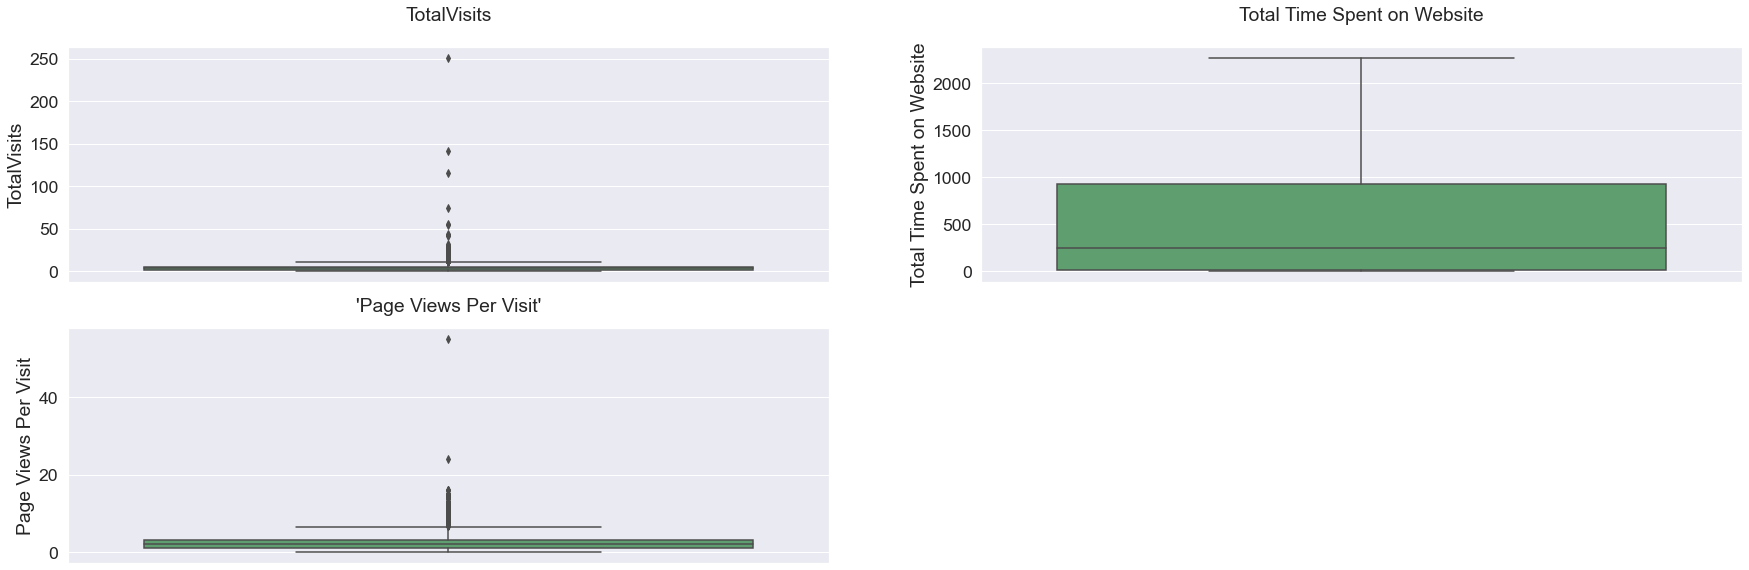

In [22]:
# Plotting box plots to find outliers in continuous independent variables
plt.figure(1, figsize=(30, 25))
sns.set(font_scale=1.6)

# subplot 1:
plt.subplot(5, 2, 1)
sns.boxplot(y='TotalVisits', data=leadInfo,color='g')
plt.title("TotalVisits\n")
#plt.yscale('log')

#leadInfo['Total Time Spent on Website']=round(leadInfo['Total Time Spent on Website']/60,2)
# subplot 2:
plt.subplot(5, 2, 2)
sns.boxplot(y='Total Time Spent on Website', data=leadInfo,color='g')
plt.title("Total Time Spent on Website\n")

# subplot 3:
plt.subplot(5, 2, 3)
sns.boxplot(y='Page Views Per Visit', data=leadInfo,color='g')
plt.title("'Page Views Per Visit'\n",pad=-4.0)

### Observation:
1. From the above boxplot we observe there are Outliers in "TotalVisits" and "Page Views Per Visit" columns. We can remove values above 97 percentile, as the number of outliers rows is very minimum in dataframe

In [23]:
#diff1 will provide the difference between outliers and 99th percentile. If the value is too big, we can conclude that there are outliers.
diff1 = leadInfo.TotalVisits.max() - leadInfo.TotalVisits.quantile(0.97)
print('Outliers count that are removed in TotalVisits :',diff1)

#Selecting only 97 percentile of data to remove outliers 
q1_TotalVisits=leadInfo['TotalVisits'].quantile(0.97)
leadInfo=leadInfo[leadInfo['TotalVisits']<q1_TotalVisits]

#diff2 will provide the difference between outliers and 99th percentile. If the value is too big, we can conclude that there are outliers.
diff2 = leadInfo['Page Views Per Visit'].max() - leadInfo['Page Views Per Visit'].quantile(0.97)
print('Outliers count thatare removed in Page Views :',diff2)

q2_pageview=leadInfo['Page Views Per Visit'].quantile(0.97)
leadInfo=leadInfo[leadInfo['Page Views Per Visit']<q2_pageview]

Outliers count that are removed in TotalVisits : 240.0
Outliers count thatare removed in Page Views : 3.0


Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    8445.000000  8445.000000  8445.000000                  8445.000000   
mean   617000.027472     0.374778     2.754174                   468.572054   
std     23289.142312     0.484094     2.330357                   541.698874   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596376.000000     0.000000     0.000000                     0.000000   
50%    615473.000000     0.000000     2.000000                   233.000000   
75%    637048.000000     1.000000     4.000000                   886.000000   
90%    649865.000000     1.000000     6.000000                  1362.000000   
95%    655237.400000     1.000000     7.000000                  1548.000000   
99%    659558.920000     1.000000    10.000000                  1826.000000   
max    660737.000000     1.000000    10.000000                  2272.000000   

       Page Views Per Visit  
count           8445.000000  
mean               2.071957  
std                1.649040  
min                0.000000  
25%                0.000000  
50%                2.000000  
75%                3.000000  
90%                4.000000  
95%                5.000000  
99%                6.000000  
max                6.000000

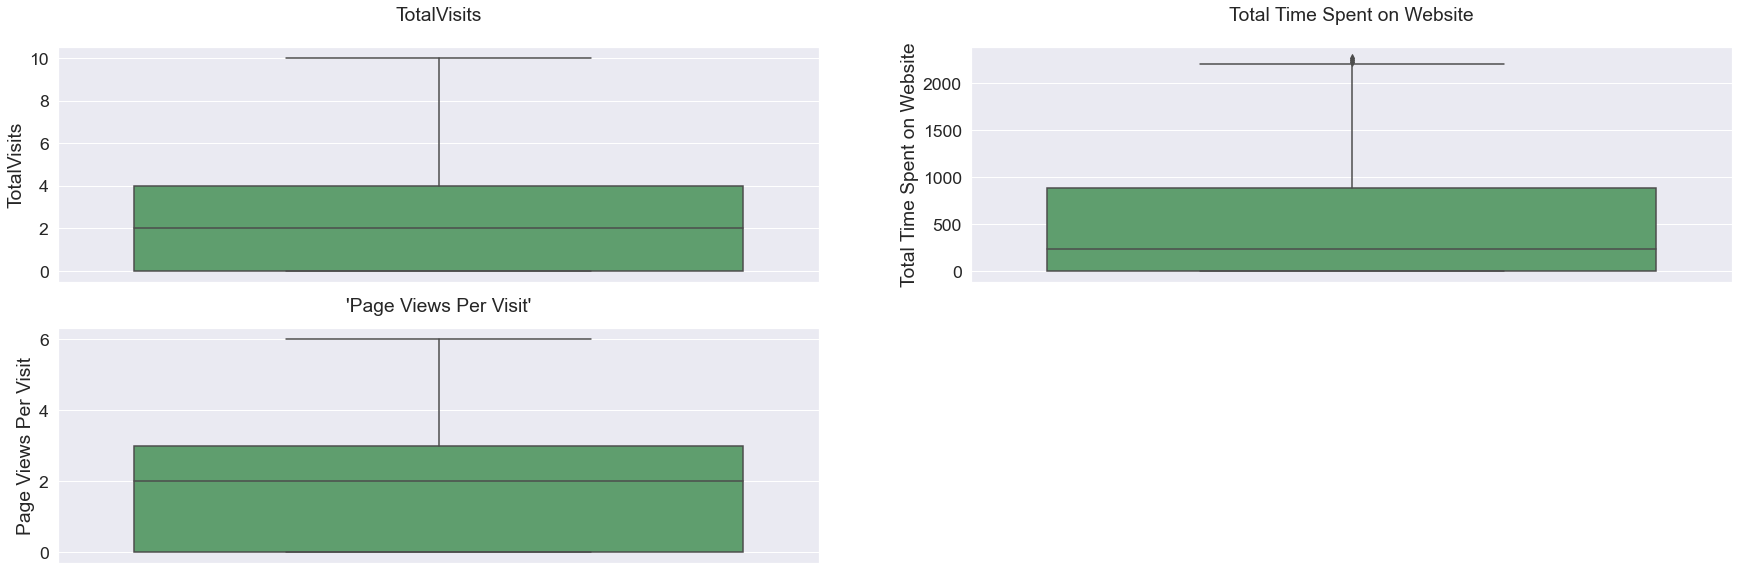

In [24]:
# Re - Plotting box plots to find if the outliers in continuous independent variables are removed
plt.figure(1, figsize=(30, 25))
sns.set(font_scale=1.6)

# subplot 1:
plt.subplot(5, 2, 1)
sns.boxplot(y='TotalVisits', data=leadInfo,color='g')
plt.title("TotalVisits\n")
#plt.yscale('log')

# subplot 2:
plt.subplot(5, 2, 2)
sns.boxplot(y='Total Time Spent on Website', data=leadInfo,color='g')
plt.title("Total Time Spent on Website\n")

# subplot 3:
plt.subplot(5, 2, 3)
sns.boxplot(y='Page Views Per Visit', data=leadInfo,color='g')
plt.title("'Page Views Per Visit'\n",pad=-4.0)

# Statistica table to find if the outliers in continuous independent variables are removed
leadInfo.describe(percentiles=[.25,.5,.75,.90,.95,.99])

## Task 5: Normalizing Data
1. In the categorical Variables some of the values in that column occur less than 1% . Those values can be grouped together thereby reducing the number of columns during dummy variables creation
2. In some of the categorical Variables where one values occur more than 99%. There column can be removed.

In [25]:
# Checking the percentage of values in the categorical column
leadInfo['Lead Origin'].value_counts(normalize=True)*100

Landing Page Submission    52.184725
API                        40.651273
Lead Add Form               6.820604
Lead Import                 0.343398
Name: Lead Origin, dtype: float64

In [26]:
# Checking the percentage of values in the categorical column
leadInfo['Do Not Email'].value_counts(normalize=True)*100

No     92.303138
Yes     7.696862
Name: Do Not Email, dtype: float64

In [27]:
# Checking the percentage of values in the categorical column
leadInfo['Converted'].value_counts(normalize=True)*100

0    62.522202
1    37.477798
Name: Converted, dtype: float64

In [28]:
# Checking the percentage of values in the categorical column
print(leadInfo['A free copy of Mastering The Interview'].value_counts(normalize=True)*100)

No     69.982238
Yes    30.017762
Name: A free copy of Mastering The Interview, dtype: float64


In [29]:
# Checking the percentage of values in the categorical column
print('\n Column Name : Lead Source \n')
print('***************************Before Normalising****************************')
print(leadInfo['Lead Source'].value_counts(normalize=True)*100)
leadInfo['Lead Source'] = leadInfo['Lead Source'].replace('google', 'Google')

# Group togother values of this categorical column into one ("Others"), whose occurence are less than 1%
leadInfo['Lead Source'] = leadInfo['Lead Source'].replace(['Reference','Welingak','Website','Referral Sites','Facebook','bing',
                                                           'google','Click2call','Live Chat','Social Media','Press_Release',
                                                           'testone','NC_EDM','blog','youtubechannel','Pay per Click Ads',
                                                           'WeLearn','welearnblog_Home','Welingak Website'
                                                          ], 'Others')
print('\n\n***************************After Normalising****************************')
leadInfo['Lead Source'].value_counts(normalize=True)*100


 Column Name : Lead Source 

***************************Before Normalising****************************
Google               32.078153
Direct Traffic       27.815275
Olark Chat           20.627590
Organic Search       10.882179
Reference             5.210184
Welingak Website      1.515690
Referral Sites        1.207815
Facebook              0.355240
bing                  0.071048
google                0.059207
Click2call            0.035524
Live Chat             0.023683
Social Media          0.023683
blog                  0.011841
Press_Release         0.011841
Pay per Click Ads     0.011841
NC_EDM                0.011841
WeLearn               0.011841
welearnblog_Home      0.011841
testone               0.011841
youtubechannel        0.011841
Name: Lead Source, dtype: float64


***************************After Normalising****************************


Google            32.137359
Direct Traffic    27.815275
Olark Chat        20.627590
Organic Search    10.882179
Others             8.537596
Name: Lead Source, dtype: float64

In [30]:
# Checking the percentage of values in the categorical column
print('\n Column Name : Last Activity \n')
print('***************************Before Normalising****************************')
print(leadInfo['Last Activity'].value_counts(normalize=True)*100)

# Group togother values of this categorical column into one ("Others"), whose occurence are less than 1%
leadInfo['Last Activity'] = leadInfo['Last Activity'].replace(['Had a Phone Conversation','View in browser link Clicked',
                                                           'Approached upfront','Email Marked Spam','Email Received',
                                                           'Visited Booth in Tradeshow','Resubscribed to emails'
                                                          ], 'Others')
print('\n\n***************************After Normalising****************************')
print(leadInfo['Last Activity'].value_counts(normalize=True)*100)


 Column Name : Last Activity 

***************************Before Normalising****************************
Email Opened                    37.702783
SMS Sent                        30.041445
Olark Chat Conversation         11.178212
Page Visited on Website          6.074600
Converted to Lead                5.032564
Email Bounced                    3.576081
Email Link Clicked               3.007697
Form Submitted on Website        1.302546
Unreachable                      0.994671
Unsubscribed                     0.674956
Had a Phone Conversation         0.236827
Approached upfront               0.059207
View in browser link Clicked     0.047365
Email Received                   0.023683
Email Marked Spam                0.023683
Visited Booth in Tradeshow       0.011841
Resubscribed to emails           0.011841
Name: Last Activity, dtype: float64


***************************After Normalising****************************
Email Opened                 37.702783
SMS Sent                     3

In [31]:
# Checking the percentage of values in the categorical column
print('\n Column Name : Country \n')
print('***************************Before Normalising****************************')
print(leadInfo['Country'].value_counts(normalize=True)*100)

# Group togother values of this categorical column into one ("Others"), whose occurence are less than 1%
leadInfo['Country'].mask(leadInfo['Country'] != 'India', 'Outside India', inplace=True)
print('\n\n***************************After Normalising****************************')
print(leadInfo['Country'].value_counts(normalize=True)*100)


 Column Name : Country 

***************************Before Normalising****************************
India                   96.838366
United States            0.769686
United Arab Emirates     0.556542
Singapore                0.272351
Saudi Arabia             0.236827
United Kingdom           0.153937
Australia                0.142096
Qatar                    0.118413
Hong Kong                0.082889
Bahrain                  0.082889
Oman                     0.071048
France                   0.059207
unknown                  0.047365
Canada                   0.047365
Germany                  0.047365
Nigeria                  0.047365
Kuwait                   0.047365
South Africa             0.035524
Uganda                   0.023683
China                    0.023683
Bangladesh               0.023683
Sweden                   0.023683
Philippines              0.023683
Belgium                  0.023683
Italy                    0.023683
Asia/Pacific Region      0.023683
Ghana           

In [32]:
# Checking the percentage of values in the categorical column
print('\n Column Name : What is your current occupation \n')
print('***************************Before Normalising****************************')
print(leadInfo['What is your current occupation'].value_counts(normalize=True)*100)

# Group togother values of this categorical column into one ("Others"), whose occurence are less than 1%
leadInfo['What is your current occupation'] = leadInfo['What is your current occupation'].replace(['Other','Housewife',
                                                           'Businessman'
                                                          ], 'Others')
print('\n\n***************************After Normalising****************************')
print(leadInfo['What is your current occupation'].value_counts(normalize=True)*100)


 Column Name : What is your current occupation 

***************************Before Normalising****************************
Unemployed              89.899349
Working Professional     7.460036
Student                  2.332741
Other                    0.142096
Housewife                0.106572
Businessman              0.059207
Name: What is your current occupation, dtype: float64


***************************After Normalising****************************
Unemployed              89.899349
Working Professional     7.460036
Student                  2.332741
Others                   0.307874
Name: What is your current occupation, dtype: float64


In [33]:
# Checking the percentage of values in the categorical column
print('\n Column Name : Last Notable Activity \n')
print('***************************Before Normalising****************************')
print(leadInfo['Last Notable Activity'].value_counts(normalize=True)*100)

# Group togother values of this categorical column into one ("Others"), whose occurence are less than 1%
leadInfo['Last Notable Activity'] = leadInfo['Last Notable Activity'].replace(['Email Bounced','Unsubscribed',
                                                           'Unreachable','Had a Phone Conversation','Email Marked Spam',
                                                           'Approached upfront','View in browser link Clicked',
                                                           'Email Received','Form Submitted on Website',
                                                           'Resubscribed to emails'
                                                          ], 'Others')
print('\n\n***************************After Normalising****************************')
print(leadInfo['Last Notable Activity'].value_counts(normalize=True)*100)


 Column Name : Last Notable Activity 

***************************Before Normalising****************************
Modified                        36.802842
Email Opened                    30.882179
SMS Sent                        23.789224
Page Visited on Website          2.818236
Olark Chat Conversation          2.048549
Email Link Clicked               1.894612
Email Bounced                    0.698638
Unsubscribed                     0.509177
Unreachable                      0.355240
Had a Phone Conversation         0.118413
Email Marked Spam                0.023683
Email Received                   0.011841
Form Submitted on Website        0.011841
Approached upfront               0.011841
View in browser link Clicked     0.011841
Resubscribed to emails           0.011841
Name: Last Notable Activity, dtype: float64


***************************After Normalising****************************
Modified                   36.802842
Email Opened               30.882179
SMS Sent             

In [34]:
# Checking the percentage of values in the categorical column
print(leadInfo['Do Not Call'].value_counts(normalize=True)*100)

#this column can be removed as about 99% of values are "NO"
leadInfo = leadInfo.drop(['Do Not Call'], axis=1)

No     99.976317
Yes     0.023683
Name: Do Not Call, dtype: float64


In [35]:
# Checking the percentage of values in the categorical column
print(leadInfo['What matters most to you in choosing a course'].value_counts(normalize=True)*100)

#this column can be removed as about 99% of values are "NO"
leadInfo = leadInfo.drop(['What matters most to you in choosing a course'], axis=1)

Better Career Prospects      99.976317
Flexibility & Convenience     0.011841
Other                         0.011841
Name: What matters most to you in choosing a course, dtype: float64


In [36]:
# Checking the percentage of values in the categorical column
print(leadInfo['Search'].value_counts(normalize=True)*100)

#this column can be removed as about 99% of values are "NO"
leadInfo = leadInfo.drop(['Search'], axis=1)

No     99.928952
Yes     0.071048
Name: Search, dtype: float64


In [37]:
# Checking the percentage of values in the categorical column
print(leadInfo['Magazine'].value_counts(normalize=True)*100)

#this column can be removed as about 100% of values are "NO"
leadInfo = leadInfo.drop(['Magazine'], axis=1)

No    100.0
Name: Magazine, dtype: float64


In [38]:
# Checking the percentage of values in the categorical column
print(leadInfo['Newspaper Article'].value_counts(normalize=True)*100)

#this column can be removed as about 100% of values are "NO"
leadInfo = leadInfo.drop(['Newspaper Article'], axis=1)

No    100.0
Name: Newspaper Article, dtype: float64


In [39]:
# Checking the percentage of values in the categorical column
print(leadInfo['X Education Forums'].value_counts(normalize=True)*100)

#this column can be removed as about 100% of values are "NO"
leadInfo = leadInfo.drop(['X Education Forums'], axis=1)

No    100.0
Name: X Education Forums, dtype: float64


In [40]:
# Checking the percentage of values in the categorical column
print(leadInfo['Newspaper'].value_counts(normalize=True)*100)

#this column can be removed as about 99% of values are "NO"
leadInfo = leadInfo.drop(['Newspaper'], axis=1)

No     99.988159
Yes     0.011841
Name: Newspaper, dtype: float64


In [41]:
# Checking the percentage of values in the categorical column
print(leadInfo['Digital Advertisement'].value_counts(normalize=True)*100)

#this column can be removed as about 99% of values are "NO"
leadInfo = leadInfo.drop(['Digital Advertisement'], axis=1)

No     99.976317
Yes     0.023683
Name: Digital Advertisement, dtype: float64


In [42]:
# Checking the percentage of values in the categorical column
print(leadInfo['Through Recommendations'].value_counts(normalize=True)*100)

#this column can be removed as about 99% of values are "NO"
leadInfo = leadInfo.drop(['Through Recommendations'], axis=1)

No     99.964476
Yes     0.035524
Name: Through Recommendations, dtype: float64


In [43]:
# Checking the percentage of values in the categorical column
print(leadInfo['Receive More Updates About Our Courses'].value_counts(normalize=True)*100)

#this column can be removed as about 100% of values are "NO"
leadInfo = leadInfo.drop(['Receive More Updates About Our Courses'], axis=1)

No    100.0
Name: Receive More Updates About Our Courses, dtype: float64


In [44]:
# Checking the percentage of values in the categorical column
print(leadInfo['Update me on Supply Chain Content'].value_counts(normalize=True)*100)

#this column can be removed as about 100% of values are "NO"
leadInfo = leadInfo.drop(['Update me on Supply Chain Content'], axis=1)

No    100.0
Name: Update me on Supply Chain Content, dtype: float64


In [45]:
# Checking the percentage of values in the categorical column
print(leadInfo['I agree to pay the amount through cheque'].value_counts(normalize=True)*100)

#this column can be removed as about 100% of values are "NO"
leadInfo = leadInfo.drop(['I agree to pay the amount through cheque'], axis=1)

No    100.0
Name: I agree to pay the amount through cheque, dtype: float64


In [46]:
# Checking the percentage of values in the categorical column
print(leadInfo['Get updates on DM Content'].value_counts(normalize=True)*100)

#this column can be removed as about 100% of values are "NO"
leadInfo = leadInfo.drop(['Get updates on DM Content'], axis=1)

No    100.0
Name: Get updates on DM Content, dtype: float64


In [47]:
# information on the Dataframe after Normalising
leadInfo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8445 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Prospect ID                             8445 non-null   object 
 1   Lead Number                             8445 non-null   int64  
 2   Lead Origin                             8445 non-null   object 
 3   Lead Source                             8445 non-null   object 
 4   Do Not Email                            8445 non-null   object 
 5   Converted                               8445 non-null   int64  
 6   TotalVisits                             8445 non-null   float64
 7   Total Time Spent on Website             8445 non-null   int64  
 8   Page Views Per Visit                    8445 non-null   float64
 9   Last Activity                           8445 non-null   object 
 10  Country                                 8445 non-null   obje

## Task 6: Data Imbalance

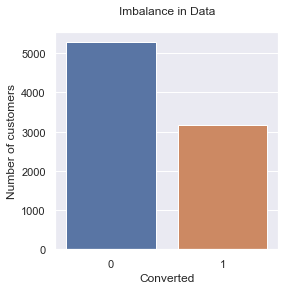


Spread of data between Converted Variable:

customers who are converted to leads:=  3165
customers who are not converted to leads:=  5280
Percentage of customers who are converted to leads:=  37.5
Percentage of customers who are not converted to leads:=  62.5


In [48]:
# Let us check the data imbalance by assessing the percentage of rows with Converted =1 and 0
targets=leadInfo.groupby('Converted').count()['Prospect ID']

plt.figure(1, figsize=(4,4))
sns.set(font_scale=1)
sns.barplot(x=targets.index, y=targets.values, label='Converted')
plt.xlabel('Converted')
plt.ylabel('Number of customers')
plt.title('Imbalance in Data\n')


plt.show()
 
print("\n" + "\033[1m" +"Spread of data between Converted Variable:"  + "\033[0m" +"\n");
print('customers who are converted to leads:= ',targets[1])
print('customers who are not converted to leads:= ',targets[0])
imbalance_defaulter=round((targets[1]/(targets[0]+targets[1]))*100,1)
print('Percentage of customers who are converted to leads:= ',imbalance_defaulter)
print('Percentage of customers who are not converted to leads:= ',(100-imbalance_defaulter) )

## Task 7: EDA


### Task 7.1: Univariate Analysis

#### Task 7.1.1: Visualising Numerical Variables

<Figure size 360x360 with 0 Axes>

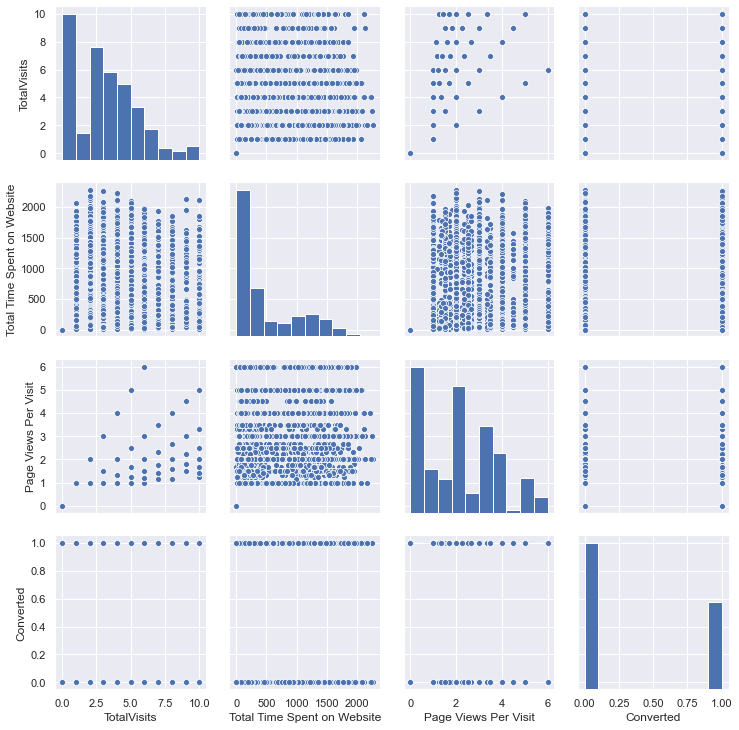

In [49]:
#Draw pairplots for continuous numeric variables using seaborn
plt.figure(figsize = (5,5))

sns.pairplot(data=leadInfo,vars=['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit','Converted'])
sns.set_context("paper", rc={"title.labelsize":10})
plt.show()

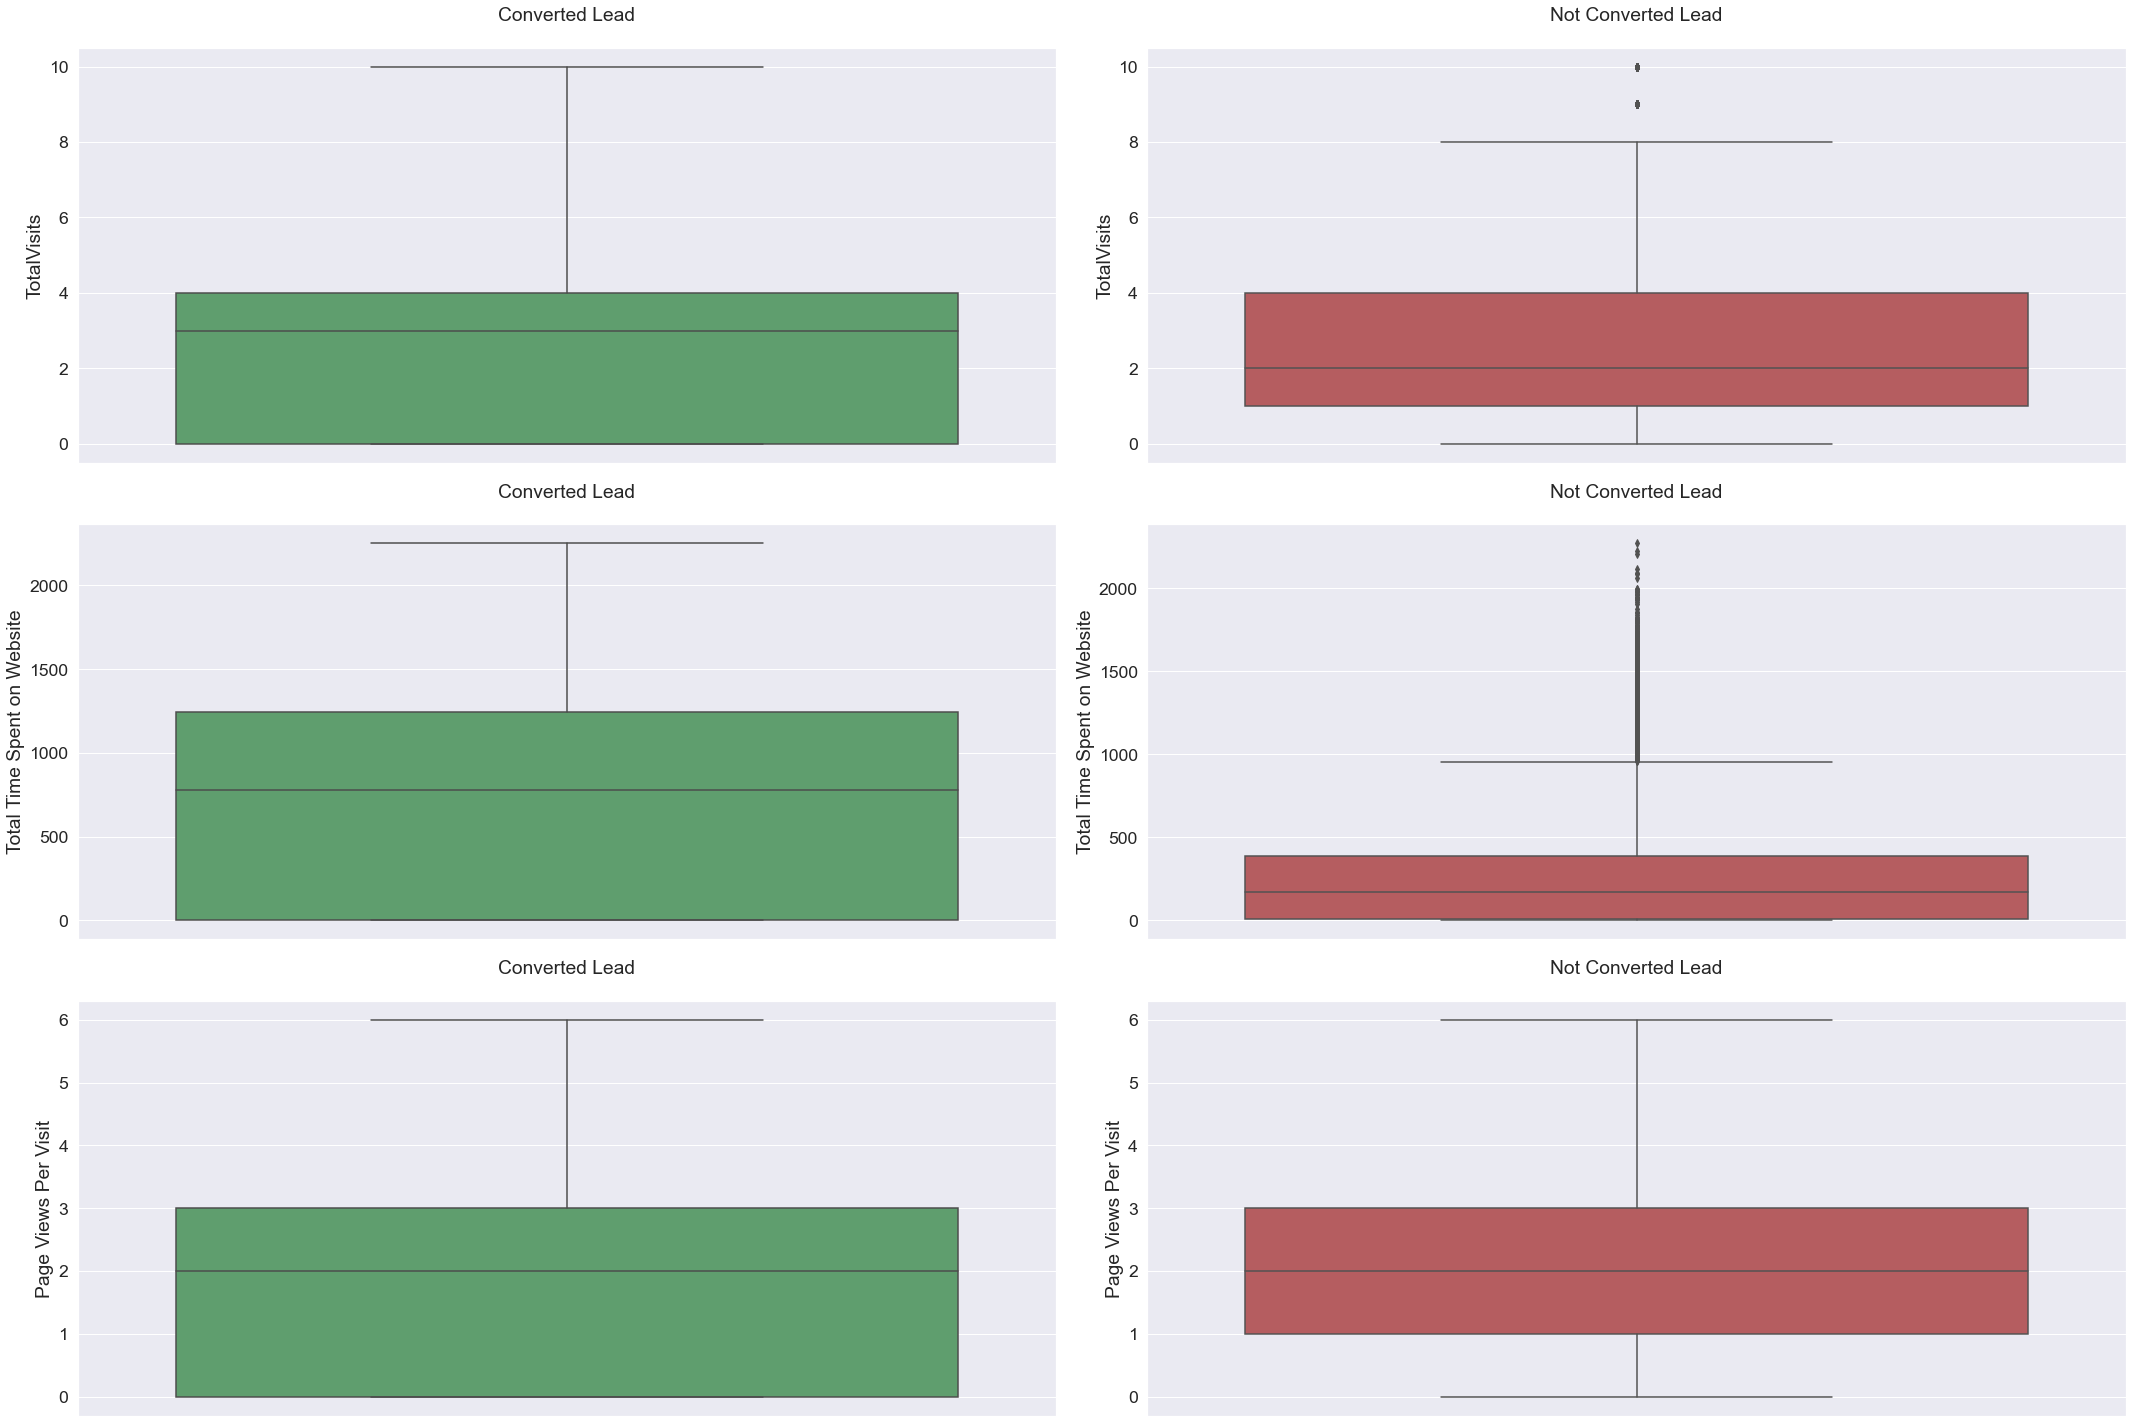

In [50]:
#Plotting boxplot for numerical variable data to observer the range of values
plt.figure(1, figsize=(30, 40))
sns.set(font_scale=1.6)

# subplot 1:
plt.subplot(6, 2, 1)
sns.boxplot(y='TotalVisits', data=leadInfo[leadInfo.Converted==1],color='g')
plt.title("Converted Lead\n")
plt.tight_layout()
plt.subplot(6, 2, 2)
sns.boxplot(y='TotalVisits', data=leadInfo[leadInfo.Converted==0],color='r')
plt.title("Not Converted Lead\n")
plt.tight_layout()


# subplot 2:
plt.subplot(6, 2, 3)
sns.boxplot(y='Total Time Spent on Website', data=leadInfo[leadInfo.Converted==1],color='g')
plt.title("Converted Lead\n")
plt.tight_layout()
plt.subplot(6, 2, 4)
sns.boxplot(y='Total Time Spent on Website', data=leadInfo[leadInfo.Converted==0],color='r')
plt.title("Not Converted Lead\n")
plt.tight_layout()


# subplot 3:
plt.subplot(6, 2, 5)
sns.boxplot(y='Page Views Per Visit', data=leadInfo[leadInfo.Converted==1],color='g')
plt.title("Converted Lead\n")
plt.tight_layout()
plt.subplot(6, 2, 6)
sns.boxplot(y='Page Views Per Visit', data=leadInfo[leadInfo.Converted==0],color='r')
plt.title("Not Converted Lead\n")
plt.tight_layout()


### Observation
1. From the PairPlot we can see the variable "Page views per visit" and "TotalVisits" are  propotional.
2. From the PairPlot histogram we can see the 'TotalVisits" ,"Page Views per visit" and "Total Time Spent on Website" are concentrated more when  value is Zero.
3. From the BoxPlot we can see 'TotalVisits" and "Total Time Spent on Website" has outliers for NON- Converted leads compared to Compared to Converted leads.
4. From the BoxPlot we can see 50 percentile i.e median of 'TotalVisits' of Converted Leads lie between 3 & 4. While for Non converted leads median of "Total Time Spent on Website" lie approximately at 2.
5. From the BoxPlot we can see 50 percentile i.e median of 'Total Time Spent on Website' of Converted Leads lie between 500 & 1000. While for Non converted leads median of "Total Time Spent on Website" lie between 0 and 500.
6. From the BoxPlot we can see 50 percentile i.e median of 'Page Views per visit' of Converted Leads lie approximately at 2. Also for Non converted leads median of "Page Views per visit" lie approximately at 2 (same).


# Variant Analysis based on Multiple Categories

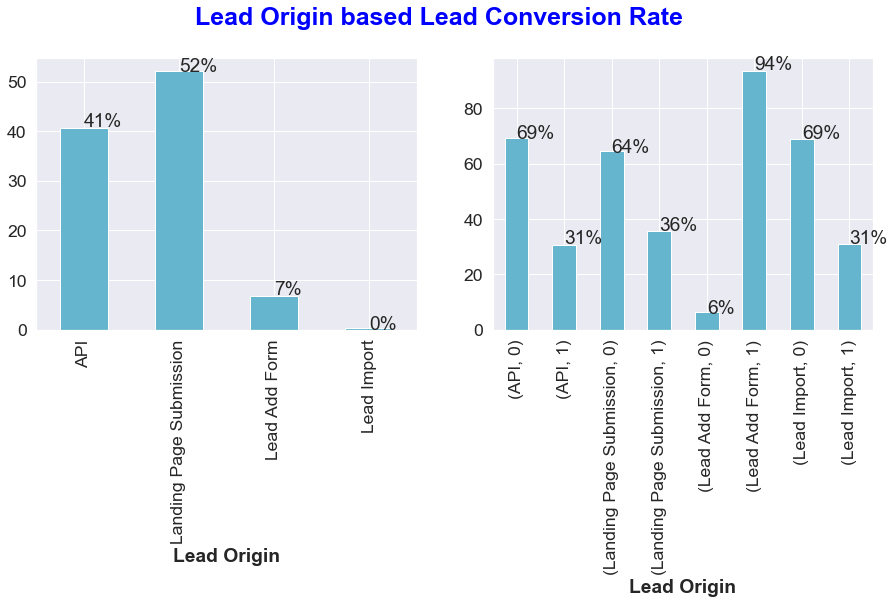

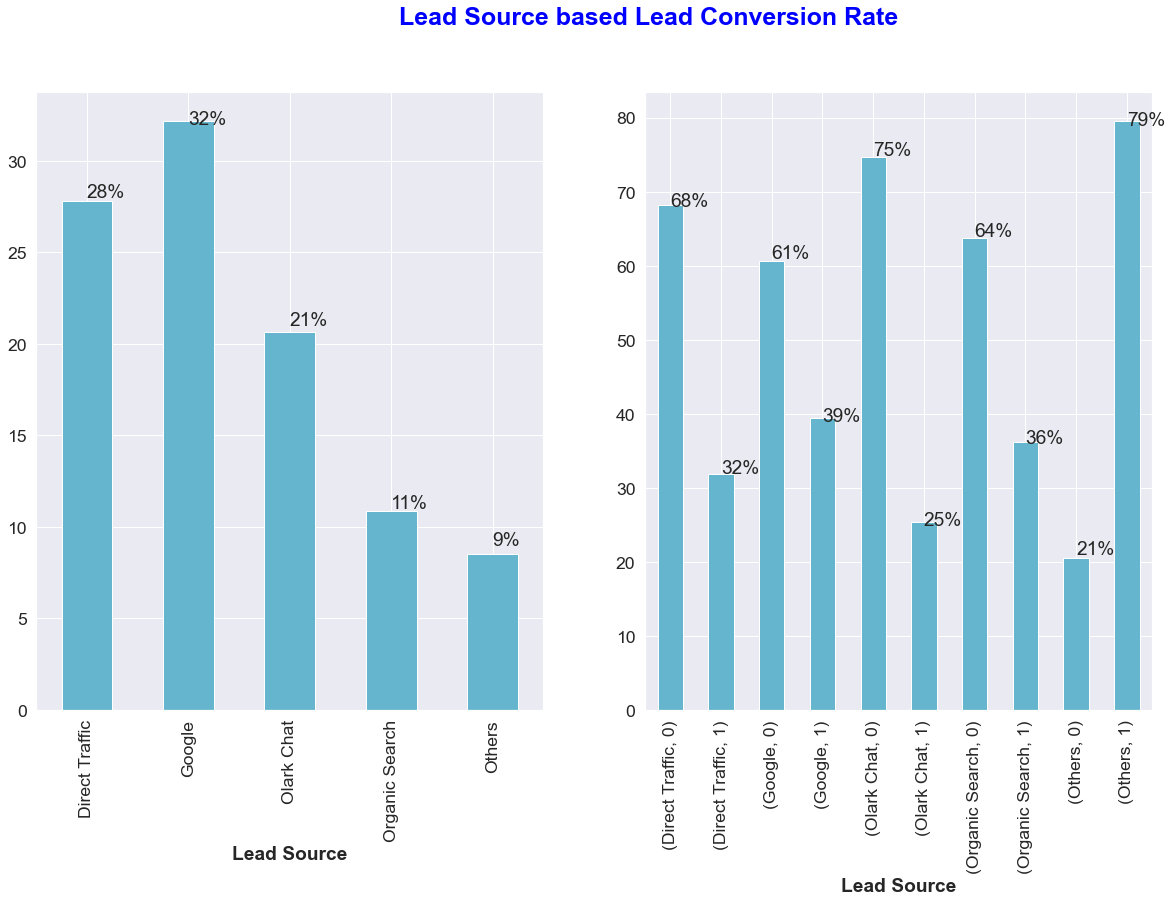

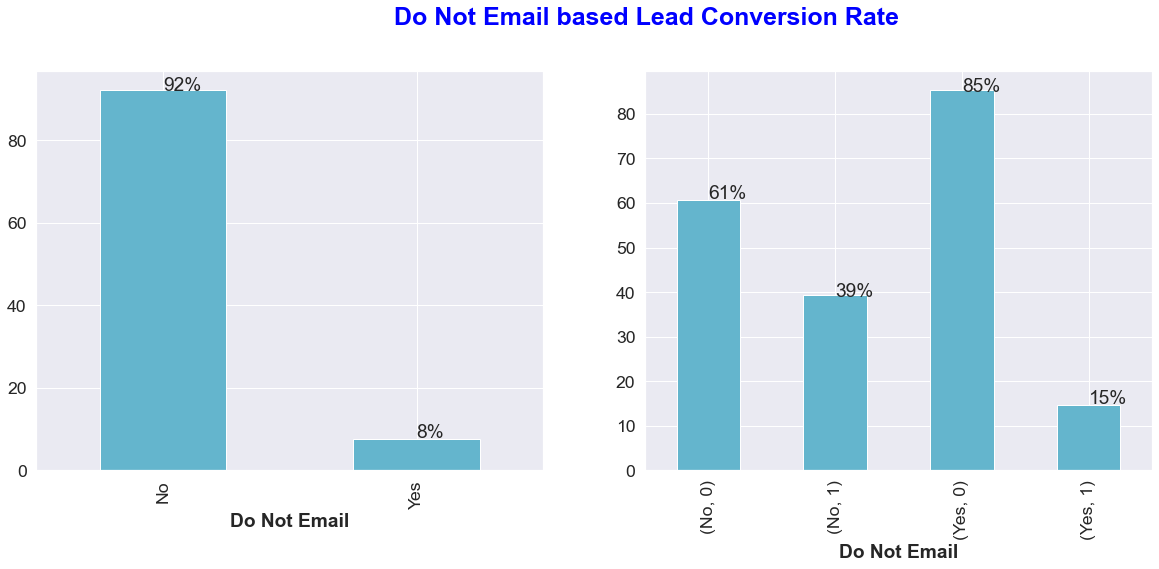

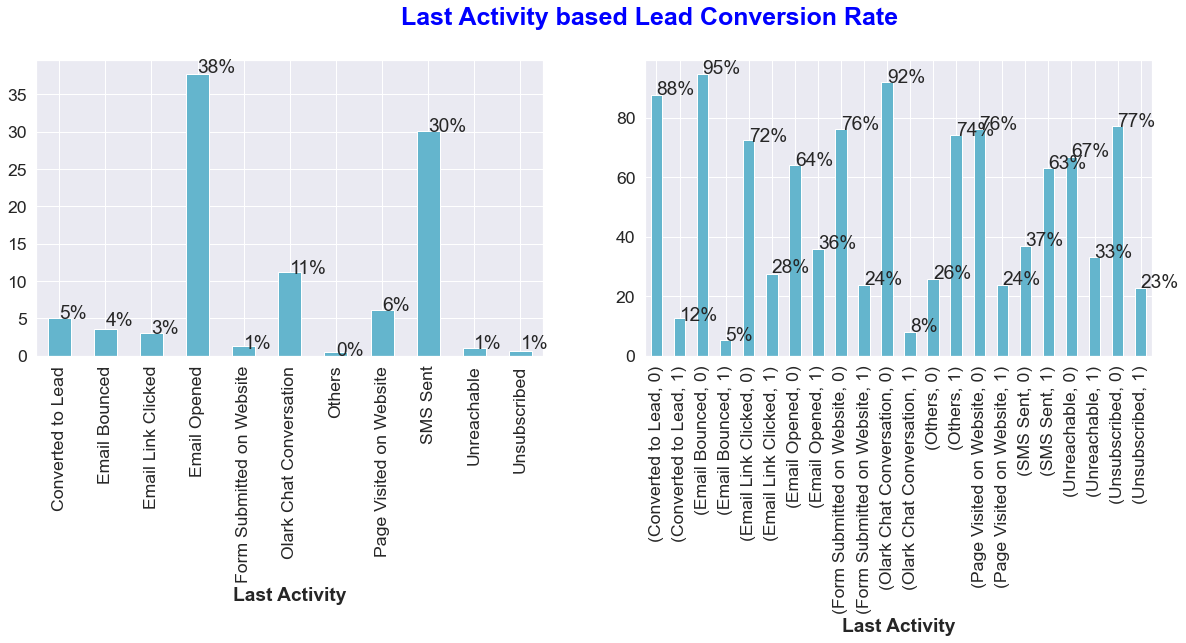

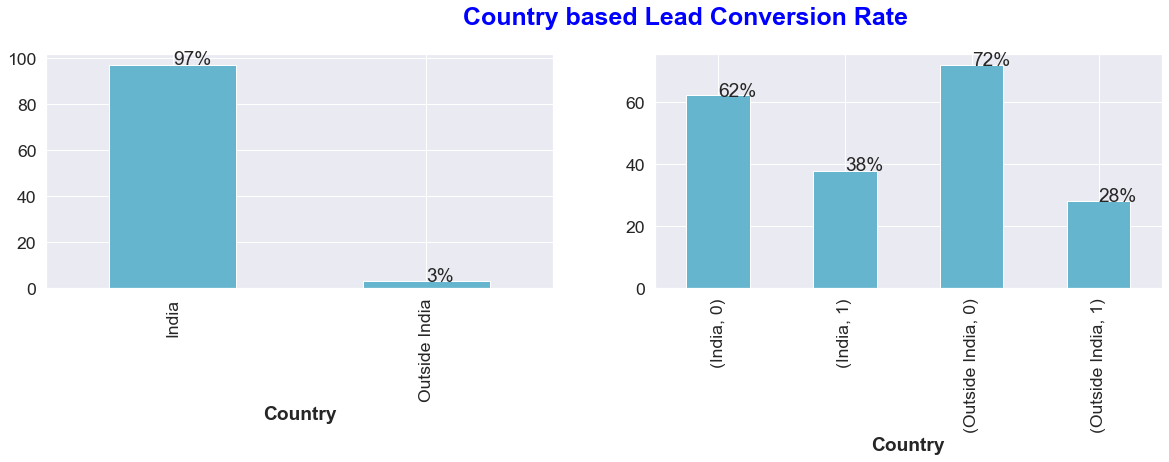

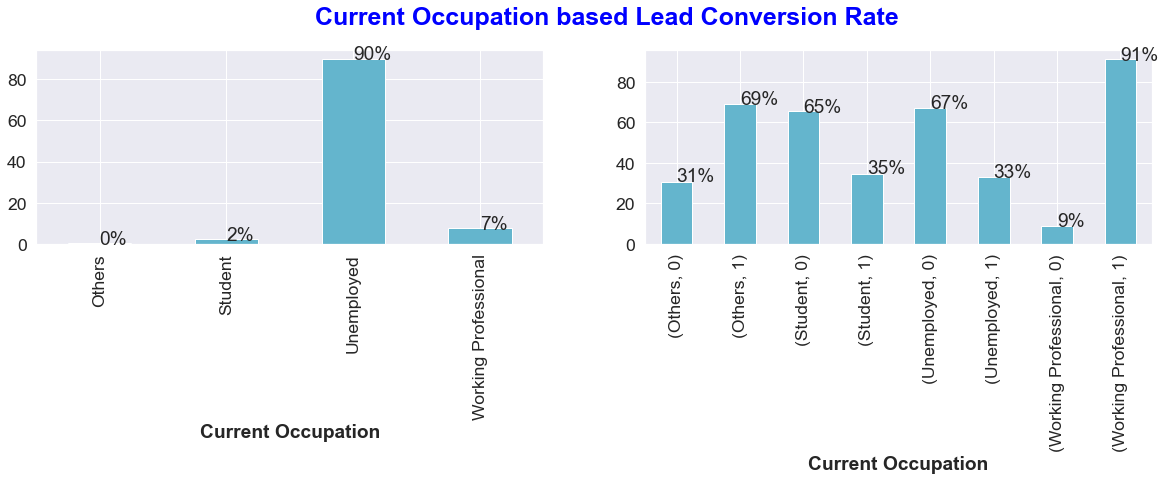

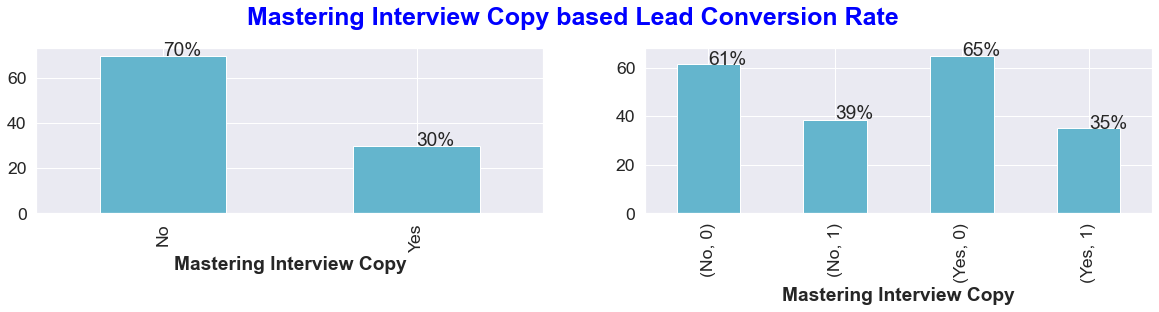

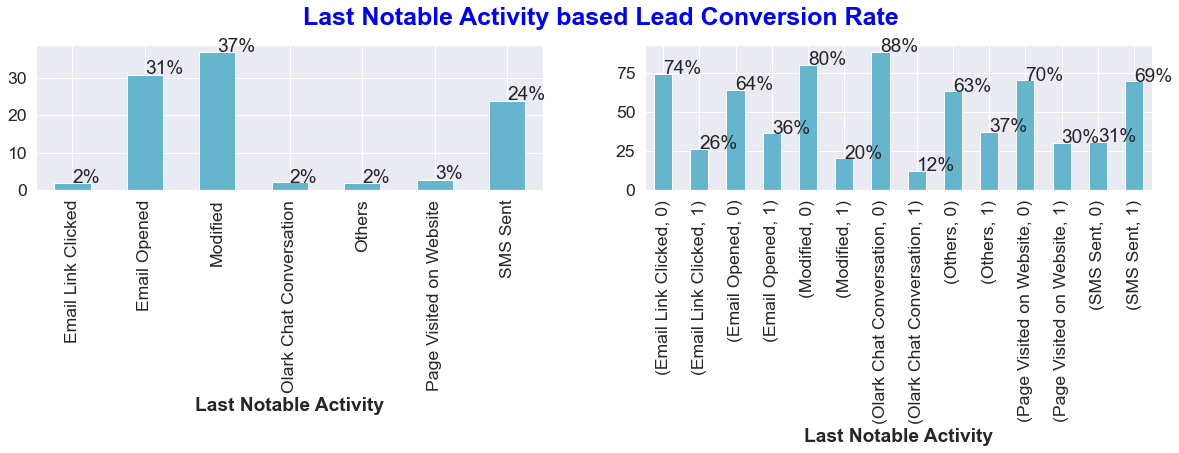

In [51]:
#calculate the percentage of conversion rate under various categories
font={'fontsize': 'large',
 'fontweight' : 'bold',
 'verticalalignment': 'top',
 'horizontalalignment': 'right'}
font1={'fontsize': 'medium',
 'fontweight' : 'bold',
 'verticalalignment': 'top',
 'horizontalalignment': 'center'}
my_colors = 'c'
catlist=['Lead Origin','Lead Source','Do Not Email','Last Activity', 'Country', 'What is your current occupation', 
                   'A free copy of Mastering The Interview','Last Notable Activity']
catdesc=['Lead Origin','Lead Source','Do Not Email','Last Activity','Country','Current Occupation','Mastering Interview Copy','Last Notable Activity']
j=0
for i in catlist:
    j=j+1
    if i=='Lead Origin':
        fig=plt.figure(figsize=(15,5))
    else:
        fig=plt.figure(figsize=(20,25))
    fig.tight_layout()
    df1=leadInfo.groupby(by=i)['Prospect ID'].count()/len(leadInfo['Prospect ID'])*100
    plt.subplot(int(str(j)+'21'))
    df1.plot(kind='bar',color=my_colors)
    x=[]
    y=[]
    for z in df1.items():
        x.append(str(z[0]))
        y.append(round(z[1]))
    for index, value in enumerate(y):
        plt.text(index, value, str(value)+'%')
    plt.xlabel(catdesc[j-1],fontdict=font1)
    df2=leadInfo.groupby(by=[i,'Converted'])['Prospect ID'].count()/leadInfo.groupby(by=i)['Prospect ID'].count()*100  
    plt.subplot(int(str(j)+'22'))
    df2.plot(kind='bar',color=my_colors)
    x=[]
    y=[]
    for z in df2.items():
        x.append(str(z[0]))
        y.append(round(z[1]))
    for index, value in enumerate(y):
        plt.text(index, value, str(value)+'%')
    plt.xlabel(catdesc[j-1],fontdict=font1)
    plt.title('            '+catdesc[j-1]+' based Lead Conversion Rate', fontsize=25, color= 'blue', fontweight='bold', y= 1.1, horizontalalignment= 'right');
    #plt.title('            '+catdesc[j-1]+' based Lead Conversion Rate',fontdict=font)
    #plt.savefig(catdesc[j-1]+".jpeg",bbox_inches='tight',dpi=150)
    plt.show()


### Observation
1. Lead Origin from "Landing Page submission" has high leads with 36% conversion rate, however "Lead Add Form" tops the chart with higher conversion rate of 94% of its total leads get converted.
2. Through 'Google' company gets higher of number of leads in that 39% gets converted.
3. Leads which company gets from other means have higher conversion rate of 79%.
4. People who are ok to receive mail are the 92% of the total leads and on which 39% of leads gets converted.
5. Last activity like "1. Email Opened (38%)", "2. SMS Sent (30%)" and "3. Olark Chat (11%)" are the top 3 activities through which most of leads are generated. However the lead conversion rate follows the order "1. SMS Sent (63%)" , "2. Email Opened (36%)" and "3. Olark Chat (8%)"
6. Indian resident has more probability to be converted to lead with 38%.
7. 90% leads are generated by Unemployed however they have less conversion rate of 33%. So education fees might be the issue for the unemployed. Feasible loan options and placement after completion of course will encourage more unemployed leads to get converted.
8. Working Professionals are the low lead generator however most of their leads (91%) get converted. This is obvious that working professional looks for course only when they are in need and they are also capable of affording.  
9. Receiving a free mastering interview copy do not have any significant observation, since who dont receive that copy have higher conversion rate 39%.
10. Last Notable activity like "1. Modified (37%)", "2. Email Opened (31%)" and "3. SMS Sent (24%)" are the top 3 activities through which most of leads are generated. However the lead conversion rate follows the order "1. SMS Sent (69%)" , "2. Email Opened (36%)" and "3. Modified (20%)"

### Task 7.2: Data Preparation

#### Step 7.2.1 Converting categorical column which has binary variables (Yes/No) to 0/1

In [52]:
# 1)  List of variables to map 0/1 for the equivalent string value like 'yes/no'

varlist =  ['Do Not Email', 'A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the list which holds columns to be mapped
leadInfo[varlist] = leadInfo[varlist].apply(binary_map)

#Checking the percentage of columns after mapping
print(leadInfo['Do Not Email'].value_counts())
print('')
print(leadInfo['A free copy of Mastering The Interview'].value_counts())
print('')




0    7795
1     650
Name: Do Not Email, dtype: int64

0    5910
1    2535
Name: A free copy of Mastering The Interview, dtype: int64



In [53]:
# 2) Column Country has two values "India" / "Oustside India"
print('-----------------------------Column Country Before Mapping-------------------------------------------\n')
print(leadInfo['Country'].value_counts())

# Defining the map function for column Country
def resident_map(x):
    return x.map({'India': 1, "Outside India": 0})


# Applying the function to the Country Column and storing it in a new column "Indian_resident"
leadInfo['Indian_resident'] = leadInfo[['Country']].apply(resident_map)

# Drop the redundant column 'Country'
leadInfo = leadInfo.drop(['Country'], axis=1)

print('-----------------------------Column Country After Mapping-------------------------------------------\n')
print(leadInfo['Indian_resident'].value_counts())

-----------------------------Column Country Before Mapping-------------------------------------------

India            8178
Outside India     267
Name: Country, dtype: int64
-----------------------------Column Country After Mapping-------------------------------------------

1    8178
0     267
Name: Indian_resident, dtype: int64


#### Step 7.2.2 Creating dummy variables for categorical columns which are not binary in nature

In [54]:
# Creating a dummy variable for non binary categorical variables using pandas get_dummies and dropping the first one.
dummy1 = pd.get_dummies(leadInfo[['Lead Origin',
                                    'Lead Source',
                                    'Last Activity',
                                    'What is your current occupation',
                                    'Last Notable Activity']], drop_first=True)

# Adding the results to the master dataframe
leadInfo = pd.concat([leadInfo, dummy1], axis=1)
pd.set_option('display.max_columns', None)
leadInfo.drop(['Lead Origin',
                'Lead Source',
                'Last Activity',
                'What is your current occupation',
                'Last Notable Activity'],axis=1,inplace=True)
leadInfo.head(3)

Prospect ID  Lead Number  Do Not Email  Converted  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737             0          0   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728             0          0   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727             0          1   

   TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                            0                   0.0   
1          5.0                          674                   2.5   
2          2.0                         1532                   2.0   

   A free copy of Mastering The Interview  Indian_resident  \
0                                       0                1   
1                                       0                1   
2                                       1                1   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   

   Lead Origin_Lead Import  Lead Source_Google  Lead Source_Olark Chat  \
0                        0                   0                       1   
1                        0                   0                       0   
2                        0                   0                       0   

   Lead Source_Organic Search  Lead Source_Others  \
0                           0                   0   
1                           1                   0   
2                           0                   0   

   Last Activity_Email Bounced  Last Activity_Email Link Clicked  \
0                            0                                 0   
1                            0                                 0   
2                            0                                 0   

   Last Activity_Email Opened  Last Activity_Form Submitted on Website  \
0                           0                                        0   
1                           1                                        0   
2                           1                                        0   

   Last Activity_Olark Chat Conversation  Last Activity_Others  \
0                                      0                     0   
1                                      0                     0   
2                                      0                     0   

   Last Activity_Page Visited on Website  Last Activity_SMS Sent  \
0                                      1                       0   
1                                      0                       0   
2                                      0                       0   

   Last Activity_Unreachable  Last Activity_Unsubscribed  \
0                          0                           0   
1                          0                           0   
2                          0                           0   

   What is your current occupation_Student  \
0                                        0   
1                                        0   
2                                        1   

   What is your current occupation_Unemployed  \
0                                           1   
1                                           1   
2                                           0   

   What is your current occupation_Working Professional  \
0                                                  0      
1                                                  0      
2                                                  0      

   Last Notable Activity_Email Opened  Last Notable Activity_Modified  \
0                                   0                               1   
1                                   1                               0   
2                                   1                               0   

   Last Notable Activity_Olark Chat Conversation  \
0                                              0   
1                        

#### Step 7.2.3 Removing Sequences/Id columns which are not helpful for analysis

In [55]:
# Dropping ID columns which has no value in analysis
leadInfo = leadInfo.drop(['Prospect ID','Lead Number'], axis=1)

In [56]:
# checking columns after data preparation process
print(leadInfo.info())
print(leadInfo.shape)
print(round(100*(leadInfo.isnull().sum()/len(leadInfo.index)), 2).sort_values(ascending=False))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8445 entries, 0 to 9239
Data columns (total 33 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Do Not Email                                          8445 non-null   int64  
 1   Converted                                             8445 non-null   int64  
 2   TotalVisits                                           8445 non-null   float64
 3   Total Time Spent on Website                           8445 non-null   int64  
 4   Page Views Per Visit                                  8445 non-null   float64
 5   A free copy of Mastering The Interview                8445 non-null   int64  
 6   Indian_resident                                       8445 non-null   int64  
 7   Lead Origin_Landing Page Submission                   8445 non-null   uint8  
 8   Lead Origin_Lead Add Form                             8445

### Task 8: Correlation between independent  variables

In [57]:
# Checking independentvariables relationship with each other using heatmap
leadInfo_corr = leadInfo.corr()
fig=plt.figure(figsize=(150,150))
sns.heatmap(leadInfo_corr,square=True, cmap='RdYlGn',fmt = '.2g',annot=True, annot_kws={"fontsize":70,"weight": "bold"})
plt.xticks(fontsize=70, weight='bold')
plt.yticks(fontsize=70, weight='bold')

plt.show()

In [58]:
#Identifying Highly co-related values by highlighting in yellow in corelation matrix

leadInfo_corr.style.applymap(lambda x: 'background-color : yellow' if ((x>=0.6 or x <= -0.6) and (x !=1.000000)) else '')

### Observations

1. Last Activity_Email Bounced & Do Not Email --Also Do Not Email is highly co-related to converted
2. Page Views Per Visit & Total Visits are highly corelated --Also Total Visits highly co-related to converted
3. Lead Source_Others & Lead Origin_Lead Add Form are highly corelated --Also Lead Origin_Lead Add Form is highly correlated to Converted
4. Last Activity_Email Opened & Last Notable Activity_Email Opened are highly corelated --Also Last Activity_Email Opened is highly correlated to Converted
5. Last Activity_Page Visited on Website & Last Notable Activity_Page Visited on Website are highly corelated --Also Last Activity_Page Visited on Website is highly correlated to Converted
6. Last Notable Activity_SMS Sent  & Last Activity_SMS Sent are highly corelated-- Also Last Notable Activity_SMS Sent is highly correlated to Converted
7. What is your current occupation_Unemployed & What is your current occupation_Working Professional are highly corelated--Also  What is your current occupation_Working Professional is highly correlated to converted
8. Last Notable Activity_Email Opened & Last Activity_Email Opened are highly corelated-- Also Last Activity_Email Opened corelated to Converted



In [59]:
#based on above observation following highly corelated Independent variables can be dropped
leadInfo = leadInfo.drop(['Last Activity_Email Bounced','Page Views Per Visit',
                          'Lead Source_Others','Last Notable Activity_Email Opened',
                          'Last Notable Activity_Page Visited on Website','Last Activity_SMS Sent',
                          'What is your current occupation_Unemployed','Last Notable Activity_Email Opened'
                         ], axis=1)

In [60]:
print(leadInfo.info(),'\n')
print(leadInfo.shape,'\n')
print(round(100*(leadInfo.isnull().sum()/len(leadInfo.index)), 2).sort_values(ascending=False))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8445 entries, 0 to 9239
Data columns (total 26 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Do Not Email                                          8445 non-null   int64  
 1   Converted                                             8445 non-null   int64  
 2   TotalVisits                                           8445 non-null   float64
 3   Total Time Spent on Website                           8445 non-null   int64  
 4   A free copy of Mastering The Interview                8445 non-null   int64  
 5   Indian_resident                                       8445 non-null   int64  
 6   Lead Origin_Landing Page Submission                   8445 non-null   uint8  
 7   Lead Origin_Lead Add Form                             8445 non-null   uint8  
 8   Lead Origin_Lead Import                               8445

### Task 9: Test Train Split

In [61]:
# importing necessary libraries for splitting dataset int Test & Train 
from sklearn.model_selection import train_test_split

In [62]:
# Assigning only feature variable to X

X = leadInfo.drop(['Converted'], axis=1)
X.head()

# Assigning response/target variable to y

y = leadInfo['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [63]:
# Splitting the dataset into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [64]:
### Checking the Initial Conversion Rate percentage

converted = round((sum(leadInfo['Converted'])/len(leadInfo['Converted'].index))*100,1)
converted

37.5

### Step 10: Rescaling the Continous numeric features values with Standard Scaling

In [65]:
#importng necessary libraries for Rescaling
from sklearn.preprocessing import StandardScaler

In [66]:
#initialising SKlearn libary modules
scaler = StandardScaler()

#splitting data into Train and Test set
X_train[['TotalVisits','Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website']])

#displaying the changes
X_train.head()

Do Not Email  TotalVisits  Total Time Spent on Website  \
5279             1    -0.314975                    -0.504462   
3099             0    -0.314975                    -0.480383   
91               0     1.396648                     1.279233   
1577             0    -1.170787                    -0.865647   
487              0    -0.314975                    -0.617448   

      A free copy of Mastering The Interview  Indian_resident  \
5279                                       0                1   
3099                                       0                1   
91                                         1                1   
1577                                       0                1   
487                                        0                1   

      Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
5279                                    1                          0   
3099                                    1                          0   
91                                      0                          0   
1577                                    0                          1   
487                                     0                          0   

      Lead Origin_Lead Import  Lead Source_Google  Lead Source_Olark Chat  \
5279                        0                   0                       0   
3099                        0                   0                       0   
91                          0                   0                       1   
1577                        0                   0                       0   
487                         0                   1                       0   

      Lead Source_Organic Search  Last Activity_Email Link Clicked  \
5279                           0                                 0   
3099                           0                                 0   
91                             0                                 0   
1577                           0                                 0   
487                            0                                 0   

      Last Activity_Email Opened  Last Activity_Form Submitted on Website  \
5279                           0                                        0   
3099                           0                                        0   
91                             1                                        0   
1577                           1                                        0   
487                            1                                        0   

      Last Activity_Olark Chat Conversation  Last Activity_Others  \
5279                                      0                     0   
3099                                      0                     0   
91                                        0                     0   
1577                                      0                     0   
487                                       0                     0   

      Last Activity_Page Visited on Website  Last Activity_Unreachable  \
5279                                      0                          0   
3099                                      0                          0   
91                                        0                          0   
1577                                      0                          0   
487                                       0                          0   

      Last Activity_Unsubscribed  What is your current occupation_Student  \
5279                           0                                        0   
3099                           0                                        0   
91                             0                                        0   
1577                           0                                        0   
487                            0                                        0   

      What is your current occupation_Working Professional  \
5279                                                  0      
309

### Step 11: Model Building

In [67]:
#importing necessary libraries for model building
import statsmodels.api as sm

In [68]:
# Logistic regression model using stasmodel library
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5911
Model:                            GLM   Df Residuals:                     5885
Model Family:                Binomial   Df Model:                           25
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2488.9
Date:                Sun, 16 May 2021   Deviance:                       4977.7
Time:                        22:33:12   Pearson chi2:                 6.01e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.7346      0.283     -6.129      0.000      -2.289      -1.180
Do Not Email                                            -1.3842      0.197     -7.037      0.000      -1.770      -0.999
TotalVisits                                              0.2103      0.049      4.253      0.000       0.113       0.307
Total Time Spent on Website                              1.0691      0.041     25.790      0.000       0.988       1.150
A free copy of Mastering The Interview                   0.0368      0.111      0.331      0.741      -0.181       0.255
Indian_resident                                          0.1778      0.212      0.838      0.402      -0.238       0.594
Lead Origin_Landing Page Submission                     -0.2550      0.106     -2.395      0.017      -0.464      -0.046
Lead Origin_Lead Add Form                                4.4547      0.250     17.805      0.000       3.964       4.945
Lead Origin_Lead Import                                  1.5897      0.498      3.191      0.001       0.613       2.566
Lead Source_Google                                       0.2495      0.115      2.168      0.030       0.024       0.475
Lead Source_Olark Chat                                   1.4519      0.163      8.900      0.000       1.132       1.772
Lead Source_Organic Search                               0.0402      0.136      0.294      0.768      -0.227       0.308
Last Activity_Email Link Clicked                        -0.2174      0.248     -0.877      0.380      -0.703       0.268
Last Activity_Email Opened                               0.2416      0.154      1.564      0.118      -0.061       0.544
Last Activity_Form Submitted on Website                 -0.3111      0.345     -0.901      0.367      -0.988       0.365
Last Activity_Olark Chat Conversation                   -1.2780      0.211     -6.044      0.000      -1.692      -0.864
Last Activity_Others                                     1.9373      0.698      2.777      0.005       0.570       3.305
Last Activity_Page Visited on Website                   -0.4109      0.200     -2.054      0.040      -0.803      -0.019
Last Activity_Unreachable                                0.2782      0.358      0.777      0.437      -0.424       0.980
Last Activity_Unsubscribed                               0.4004      0.536      0.747      0.455      -0.650       1.450
What is your current occupation_Student                  0.1993      0.239      0.835      0.404      -0.269       0.667
What is your current occupation_Working Professional     2.5685      0.186     13.775      0.000       2.203       2.934
Last Notable Activity_Modified                          -0

### Observation
1. From the summary we could see not all feature variables are significant. Hence lets rebuild model using RFE Feature selection Method


#### Step 11.1: Feature Selection Using RFE

In [69]:
#importing necessary libraries 
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [70]:
#importing necessary libraries for RFE feature selection
from sklearn.feature_selection import RFE

# Executing RFE expecting 20 variables as output
rfe = RFE(logreg, 20)            
rfe = rfe.fit(X_train, y_train)

In [71]:
rfe.support_

array([ True, False,  True, False, False,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True])

In [72]:
#Features which are selected by RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 2),
 ('Total Time Spent on Website', True, 1),
 ('A free copy of Mastering The Interview', False, 6),
 ('Indian_resident', False, 4),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Source_Google', True, 1),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 5),
 ('Last Activity_Email Link Clicked', True, 1),
 ('Last Activity_Email Opened', True, 1),
 ('Last Activity_Form Submitted on Website', True, 1),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Others', True, 1),
 ('Last Activity_Page Visited on Website', True, 1),
 ('Last Activity_Unreachable', True, 1),
 ('Last Activity_Unsubscribed', True, 1),
 ('What is your current occupation_Student', False, 3),
 ('What is your current occupation_Working Professional', True, 1),
 ('Last Notable Activity_Modified', True, 1),
 ('Last Notable Activity_Ola

In [73]:
# Collecting feature variables shortlisted by RFE

col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Google',
       'Lead Source_Olark Chat', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Opened', 'Last Activity_Form Submitted on Website',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Others',
       'Last Activity_Page Visited on Website', 'Last Activity_Unreachable',
       'Last Activity_Unsubscribed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Others', 'Last Notable Activity_SMS Sent'],
      dtype='object')

#### Step 11.2: Rebuilding Model - Model 2

In [74]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5911
Model:                            GLM   Df Residuals:                     5890
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2499.5
Date:                Sun, 16 May 2021   Deviance:                       4999.0
Time:                        22:33:14   Pearson chi2:                 6.03e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.5082      0.181     -8.314      0.000      -1.864      -1.153
Do Not Email                                            -1.4069      0.195     -7.200      0.000      -1.790      -1.024
Total Time Spent on Website                              1.0816      0.041     26.194      0.000       1.001       1.163
Lead Origin_Landing Page Submission                     -0.2048      0.095     -2.159      0.031      -0.391      -0.019
Lead Origin_Lead Add Form                                4.1601      0.232     17.893      0.000       3.704       4.616
Lead Origin_Lead Import                                  1.2793      0.490      2.613      0.009       0.320       2.239
Lead Source_Google                                       0.2342      0.085      2.756      0.006       0.068       0.401
Lead Source_Olark Chat                                   1.1645      0.135      8.600      0.000       0.899       1.430
Last Activity_Email Link Clicked                        -0.1638      0.247     -0.663      0.508      -0.648       0.321
Last Activity_Email Opened                               0.2924      0.154      1.904      0.057      -0.009       0.593
Last Activity_Form Submitted on Website                 -0.2541      0.343     -0.740      0.459      -0.927       0.419
Last Activity_Olark Chat Conversation                   -1.2181      0.210     -5.794      0.000      -1.630      -0.806
Last Activity_Others                                     1.9769      0.694      2.848      0.004       0.616       3.337
Last Activity_Page Visited on Website                   -0.2623      0.196     -1.341      0.180      -0.646       0.121
Last Activity_Unreachable                                0.3275      0.359      0.912      0.362      -0.376       1.031
Last Activity_Unsubscribed                               0.4423      0.535      0.826      0.409      -0.607       1.491
What is your current occupation_Working Professional     2.5544      0.185     13.783      0.000       2.191       2.918
Last Notable Activity_Modified                          -0.2236      0.121     -1.848      0.065      -0.461       0.014
Last Notable Activity_Olark Chat Conversation           -0.5119      0.426     -1.201      0.230      -1.347       0.323
Last Notable Activity_Others                             1.0909      0.384      2.839      0.005       0.338       1.844
Last Notable Activity_SMS Sent                           1.6593      0.173      9.591      0.000       1.320       1.998
========================================================================================================================
"""

### Observations
1. The Dummy Feature variable "Last Activity_Email Link Clicked" has high p value, hence it can be removed as it is insignificant

In [75]:
#dropping the column based on above abservation
col = col.drop('Last Activity_Email Link Clicked',1)

#### Step 11.3:  Rebuilding Model - Model 3

In [76]:
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5911
Model:                            GLM   Df Residuals:                     5891
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2499.7
Date:                Sun, 16 May 2021   Deviance:                       4999.5
Time:                        22:33:14   Pearson chi2:                 6.04e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.5610      0.163     -9.577      0.000      -1.880      -1.242
Do Not Email                                            -1.3951      0.195     -7.165      0.000      -1.777      -1.013
Total Time Spent on Website                              1.0818      0.041     26.196      0.000       1.001       1.163
Lead Origin_Landing Page Submission                     -0.2054      0.095     -2.166      0.030      -0.391      -0.020
Lead Origin_Lead Add Form                                4.1521      0.232     17.888      0.000       3.697       4.607
Lead Origin_Lead Import                                  1.2813      0.490      2.616      0.009       0.321       2.241
Lead Source_Google                                       0.2328      0.085      2.740      0.006       0.066       0.399
Lead Source_Olark Chat                                   1.1562      0.135      8.580      0.000       0.892       1.420
Last Activity_Email Opened                               0.3435      0.133      2.585      0.010       0.083       0.604
Last Activity_Form Submitted on Website                 -0.2245      0.341     -0.659      0.510      -0.892       0.443
Last Activity_Olark Chat Conversation                   -1.1844      0.204     -5.800      0.000      -1.585      -0.784
Last Activity_Others                                     2.0033      0.693      2.890      0.004       0.645       3.362
Last Activity_Page Visited on Website                   -0.2217      0.186     -1.194      0.233      -0.586       0.142
Last Activity_Unreachable                                0.3523      0.357      0.986      0.324      -0.348       1.053
Last Activity_Unsubscribed                               0.4499      0.536      0.840      0.401      -0.600       1.500
What is your current occupation_Working Professional     2.5566      0.185     13.791      0.000       2.193       2.920
Last Notable Activity_Modified                          -0.1984      0.115     -1.733      0.083      -0.423       0.026
Last Notable Activity_Olark Chat Conversation           -0.4867      0.424     -1.147      0.252      -1.319       0.345
Last Notable Activity_Others                             1.1275      0.381      2.962      0.003       0.382       1.873
Last Notable Activity_SMS Sent                           1.7140      0.152     11.266      0.000       1.416       2.012
========================================================================================================================
"""

### Observations
1. The Dummy Feature variable "Last Activity_Form Submitted on Website" has high p value, hence it can be removed as it is insignificant

In [77]:
#dropping the column based on above abservation
col = col.drop('Last Activity_Form Submitted on Website',1)

#### Step 11.4:  Rebuilding Model - Model 4

In [78]:
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5911
Model:                            GLM   Df Residuals:                     5892
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2500.0
Date:                Sun, 16 May 2021   Deviance:                       4999.9
Time:                        22:33:14   Pearson chi2:                 6.04e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.5723      0.162     -9.688      0.000      -1.890      -1.254
Do Not Email                                            -1.3881      0.195     -7.136      0.000      -1.769      -1.007
Total Time Spent on Website                              1.0817      0.041     26.198      0.000       1.001       1.163
Lead Origin_Landing Page Submission                     -0.2080      0.095     -2.195      0.028      -0.394      -0.022
Lead Origin_Lead Add Form                                4.1515      0.232     17.882      0.000       3.697       4.607
Lead Origin_Lead Import                                  1.2813      0.490      2.615      0.009       0.321       2.242
Lead Source_Google                                       0.2293      0.085      2.705      0.007       0.063       0.395
Lead Source_Olark Chat                                   1.1537      0.135      8.564      0.000       0.890       1.418
Last Activity_Email Opened                               0.3586      0.131      2.736      0.006       0.102       0.616
Last Activity_Olark Chat Conversation                   -1.1672      0.203     -5.759      0.000      -1.564      -0.770
Last Activity_Others                                     2.0188      0.693      2.913      0.004       0.661       3.377
Last Activity_Page Visited on Website                   -0.2058      0.184     -1.117      0.264      -0.567       0.155
Last Activity_Unreachable                                0.3678      0.357      1.031      0.303      -0.332       1.067
Last Activity_Unsubscribed                               0.4546      0.536      0.848      0.396      -0.596       1.505
What is your current occupation_Working Professional     2.5558      0.185     13.795      0.000       2.193       2.919
Last Notable Activity_Modified                          -0.2019      0.114     -1.764      0.078      -0.426       0.022
Last Notable Activity_Olark Chat Conversation           -0.4901      0.424     -1.155      0.248      -1.322       0.342
Last Notable Activity_Others                             1.1308      0.381      2.970      0.003       0.384       1.877
Last Notable Activity_SMS Sent                           1.7281      0.151     11.458      0.000       1.432       2.024
========================================================================================================================
"""

### Observations
1. The Dummy Feature variable "Last Activity_Unsubscribed" has high p value, hence it can be removed as it is insignificant

In [79]:
#dropping the column based on above abservation
col = col.drop('Last Activity_Unsubscribed',1)

#### Step 11.5:  Rebuilding Model - Model 5

In [80]:
X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5911
Model:                            GLM   Df Residuals:                     5893
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2500.3
Date:                Sun, 16 May 2021   Deviance:                       5000.6
Time:                        22:33:14   Pearson chi2:                 6.04e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.5696      0.162     -9.676      0.000      -1.888      -1.252
Do Not Email                                            -1.3678      0.192     -7.109      0.000      -1.745      -0.991
Total Time Spent on Website                              1.0818      0.041     26.203      0.000       1.001       1.163
Lead Origin_Landing Page Submission                     -0.2076      0.095     -2.191      0.028      -0.393      -0.022
Lead Origin_Lead Add Form                                4.1486      0.232     17.876      0.000       3.694       4.603
Lead Origin_Lead Import                                  1.2809      0.490      2.615      0.009       0.321       2.241
Lead Source_Google                                       0.2289      0.085      2.700      0.007       0.063       0.395
Lead Source_Olark Chat                                   1.1537      0.135      8.564      0.000       0.890       1.418
Last Activity_Email Opened                               0.3559      0.131      2.718      0.007       0.099       0.613
Last Activity_Olark Chat Conversation                   -1.1705      0.203     -5.778      0.000      -1.568      -0.773
Last Activity_Others                                     1.9765      0.694      2.847      0.004       0.616       3.337
Last Activity_Page Visited on Website                   -0.2101      0.184     -1.141      0.254      -0.571       0.151
Last Activity_Unreachable                                0.3047      0.352      0.866      0.387      -0.385       0.995
What is your current occupation_Working Professional     2.5516      0.185     13.793      0.000       2.189       2.914
Last Notable Activity_Modified                          -0.2013      0.114     -1.759      0.079      -0.426       0.023
Last Notable Activity_Olark Chat Conversation           -0.4898      0.424     -1.154      0.248      -1.321       0.342
Last Notable Activity_Others                             1.2807      0.335      3.821      0.000       0.624       1.938
Last Notable Activity_SMS Sent                           1.7242      0.151     11.443      0.000       1.429       2.020
========================================================================================================================
"""

### Observations
1. The Dummy Feature variable "Last Activity_Unreachable" has high p value, hence it can be removed as it is insignificant

In [81]:
#dropping the column based on above abservation
col = col.drop('Last Activity_Unreachable',1)

#### Step 11.6:  Rebuilding Model - Model 6

In [82]:
X_train_sm = sm.add_constant(X_train[col])
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5911
Model:                            GLM   Df Residuals:                     5894
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2500.7
Date:                Sun, 16 May 2021   Deviance:                       5001.3
Time:                        22:33:14   Pearson chi2:                 6.04e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.5588      0.162     -9.646      0.000      -1.876      -1.242
Do Not Email                                            -1.3984      0.190     -7.355      0.000      -1.771      -1.026
Total Time Spent on Website                              1.0807      0.041     26.195      0.000       1.000       1.162
Lead Origin_Landing Page Submission                     -0.2054      0.095     -2.168      0.030      -0.391      -0.020
Lead Origin_Lead Add Form                                4.1492      0.232     17.879      0.000       3.694       4.604
Lead Origin_Lead Import                                  1.2787      0.490      2.611      0.009       0.319       2.239
Lead Source_Google                                       0.2308      0.085      2.723      0.006       0.065       0.397
Lead Source_Olark Chat                                   1.1536      0.135      8.565      0.000       0.890       1.418
Last Activity_Email Opened                               0.3432      0.130      2.640      0.008       0.088       0.598
Last Activity_Olark Chat Conversation                   -1.1846      0.202     -5.869      0.000      -1.580      -0.789
Last Activity_Others                                     1.9432      0.696      2.793      0.005       0.580       3.307
Last Activity_Page Visited on Website                   -0.2217      0.184     -1.208      0.227      -0.582       0.138
What is your current occupation_Working Professional     2.5484      0.185     13.787      0.000       2.186       2.911
Last Notable Activity_Modified                          -0.1983      0.114     -1.735      0.083      -0.422       0.026
Last Notable Activity_Olark Chat Conversation           -0.4860      0.424     -1.145      0.252      -1.317       0.346
Last Notable Activity_Others                             1.3710      0.317      4.322      0.000       0.749       1.993
Last Notable Activity_SMS Sent                           1.7134      0.150     11.420      0.000       1.419       2.008
========================================================================================================================
"""

### Observations
1. The Dummy Feature variable "Last Notable Activity_Olark Chat Conversation" has high p value, hence it can be removed as it is insignificant

In [83]:
#dropping the column based on above abservation
col = col.drop('Last Notable Activity_Olark Chat Conversation',1)

#### Step 11.7:  Rebuilding Model - Model 7

In [84]:
X_train_sm = sm.add_constant(X_train[col])
logm7 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm7.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5911
Model:                            GLM   Df Residuals:                     5895
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2501.4
Date:                Sun, 16 May 2021   Deviance:                       5002.7
Time:                        22:33:14   Pearson chi2:                 6.04e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.5895      0.159     -9.975      0.000      -1.902      -1.277
Do Not Email                                            -1.4012      0.190     -7.377      0.000      -1.774      -1.029
Total Time Spent on Website                              1.0783      0.041     26.190      0.000       0.998       1.159
Lead Origin_Landing Page Submission                     -0.2067      0.095     -2.183      0.029      -0.392      -0.021
Lead Origin_Lead Add Form                                4.1389      0.232     17.867      0.000       3.685       4.593
Lead Origin_Lead Import                                  1.2718      0.489      2.598      0.009       0.312       2.231
Lead Source_Google                                       0.2294      0.085      2.708      0.007       0.063       0.395
Lead Source_Olark Chat                                   1.1498      0.135      8.539      0.000       0.886       1.414
Last Activity_Email Opened                               0.3695      0.128      2.891      0.004       0.119       0.620
Last Activity_Olark Chat Conversation                   -1.2811      0.188     -6.808      0.000      -1.650      -0.912
Last Activity_Others                                     1.9390      0.695      2.789      0.005       0.576       3.302
Last Activity_Page Visited on Website                   -0.2075      0.183     -1.134      0.257      -0.566       0.151
What is your current occupation_Working Professional     2.5496      0.185     13.788      0.000       2.187       2.912
Last Notable Activity_Modified                          -0.1601      0.109     -1.467      0.142      -0.374       0.054
Last Notable Activity_Others                             1.4063      0.316      4.456      0.000       0.788       2.025
Last Notable Activity_SMS Sent                           1.7466      0.147     11.865      0.000       1.458       2.035
========================================================================================================================
"""

### Observations
1. The Dummy Feature variable "Last Activity_Page Visited on Website" has high p value, hence it can be removed as it is insignificant

In [85]:
#dropping the column based on above abservation
col = col.drop('Last Activity_Page Visited on Website',1)

#### Step 11.8:  Rebuilding Model - Model 8

In [86]:
X_train_sm = sm.add_constant(X_train[col])
logm8 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm8.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5911
Model:                            GLM   Df Residuals:                     5896
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2502.0
Date:                Sun, 16 May 2021   Deviance:                       5004.0
Time:                        22:33:14   Pearson chi2:                 6.05e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.6623      0.146    -11.374      0.000      -1.949      -1.376
Do Not Email                                            -1.4002      0.190     -7.369      0.000      -1.773      -1.028
Total Time Spent on Website                              1.0769      0.041     26.188      0.000       0.996       1.157
Lead Origin_Landing Page Submission                     -0.2058      0.095     -2.175      0.030      -0.391      -0.020
Lead Origin_Lead Add Form                                4.1469      0.232     17.897      0.000       3.693       4.601
Lead Origin_Lead Import                                  1.2789      0.490      2.611      0.009       0.319       2.239
Lead Source_Google                                       0.2296      0.085      2.712      0.007       0.064       0.396
Lead Source_Olark Chat                                   1.1531      0.135      8.564      0.000       0.889       1.417
Last Activity_Email Opened                               0.4358      0.114      3.820      0.000       0.212       0.659
Last Activity_Olark Chat Conversation                   -1.2322      0.183     -6.717      0.000      -1.592      -0.873
Last Activity_Others                                     1.9731      0.696      2.836      0.005       0.609       3.337
What is your current occupation_Working Professional     2.5521      0.185     13.801      0.000       2.190       2.915
Last Notable Activity_Modified                          -0.1329      0.106     -1.251      0.211      -0.341       0.075
Last Notable Activity_Others                             1.4762      0.310      4.766      0.000       0.869       2.083
Last Notable Activity_SMS Sent                           1.8179      0.133     13.623      0.000       1.556       2.079
========================================================================================================================
"""

### Observations
1. The Dummy Feature variable "Last Notable Activity_Modified" has high p value, hence it can be removed as it is insignificant

In [87]:
#dropping the column based on above abservation
col = col.drop('Last Notable Activity_Modified',1)

#### Step 11.9:  Rebuilding Model - Model 9

In [88]:
X_train_sm = sm.add_constant(X_train[col])
logm9 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm9.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5911
Model:                            GLM   Df Residuals:                     5897
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2502.8
Date:                Sun, 16 May 2021   Deviance:                       5005.6
Time:                        22:33:14   Pearson chi2:                 6.06e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.7713      0.118    -15.034      0.000      -2.002      -1.540
Do Not Email                                            -1.4064      0.190     -7.409      0.000      -1.778      -1.034
Total Time Spent on Website                              1.0777      0.041     26.215      0.000       0.997       1.158
Lead Origin_Landing Page Submission                     -0.2022      0.095     -2.139      0.032      -0.388      -0.017
Lead Origin_Lead Add Form                                4.1477      0.232     17.901      0.000       3.694       4.602
Lead Origin_Lead Import                                  1.2727      0.489      2.602      0.009       0.314       2.231
Lead Source_Google                                       0.2283      0.085      2.697      0.007       0.062       0.394
Lead Source_Olark Chat                                   1.1572      0.135      8.599      0.000       0.893       1.421
Last Activity_Email Opened                               0.5169      0.094      5.503      0.000       0.333       0.701
Last Activity_Olark Chat Conversation                   -1.2298      0.183     -6.711      0.000      -1.589      -0.871
Last Activity_Others                                     1.9523      0.695      2.808      0.005       0.590       3.315
What is your current occupation_Working Professional     2.5549      0.185     13.825      0.000       2.193       2.917
Last Notable Activity_Others                             1.5878      0.297      5.351      0.000       1.006       2.169
Last Notable Activity_SMS Sent                           1.9247      0.103     18.680      0.000       1.723       2.127
========================================================================================================================
"""

### Observations
1. This model is good the Feature variables p values are low. We can can confirm the model by checking the VIF

##### Checking VIFs for the above mode - Model 9

In [89]:
#importing necessary libraries
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
6                              Lead Source_Olark Chat  2.14
2                 Lead Origin_Landing Page Submission  2.12
7                          Last Activity_Email Opened  2.09
12                     Last Notable Activity_SMS Sent  1.73
8               Last Activity_Olark Chat Conversation  1.62
5                                  Lead Source_Google  1.51
3                           Lead Origin_Lead Add Form  1.37
1                         Total Time Spent on Website  1.33
0                                        Do Not Email  1.26
11                       Last Notable Activity_Others  1.20
10  What is your current occupation_Working Profes...  1.17
9                                Last Activity_Others  1.06
4                             Lead Origin_Lead Import  1.02

### Observations
1. The VIF values if the feature variables are low. This is a stable good model to proceed further

In [90]:
# Getting the predicted values on the train set

y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

5279    0.019386
3099    0.362031
91      0.782688
1577    0.876579
487     0.155583
758     0.147375
7260    0.143573
7538    0.657744
2404    0.109164
8190    0.966695
dtype: float64

In [91]:
# Reshape

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.01938601, 0.36203135, 0.78268831, 0.87657929, 0.15558306,
       0.14737487, 0.14357284, 0.65774364, 0.10916412, 0.96669506])

In [92]:
##### Creating a dataframe with the actual converted flag and the predicted probabilities

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['LeadId'] = y_train.index
y_train_pred_final.head()

Converted  Converted_Prob  LeadId
0          0        0.019386    5279
1          0        0.362031    3099
2          1        0.782688      91
3          1        0.876579    1577
4          0        0.155583     487

In [93]:
##### Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

Converted  Converted_Prob  LeadId  predicted
0          0        0.019386    5279          0
1          0        0.362031    3099          0
2          1        0.782688      91          1
3          1        0.876579    1577          1
4          0        0.155583     487          0

### Step 12: Evaluation using the confusion metrics and accuracy

In [94]:
#importing necessary libraries
from sklearn import metrics

In [95]:
# Creating Confusion matrix using SKLearn

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3286  408]
 [ 711 1506]]


In [96]:
## Interpreting SKLearn Array in Matrix format
# Predicted     not_converted    converted
# Actual
# not_converted        3286        408
# converted            711        1506

In [97]:
# Checking the overall accuracy.

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8106919302994418


#### Step 12.1: Metrics - Sensitivity, Specificity, False Positive Rate, Postitive Predictive Value and Negative Predictive Value

In [98]:
#Assigning values from confusion matrix
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [99]:
# Let's see the sensitivity of our logistic regression model

TP / float(TP+FN)

0.6792963464140731

In [100]:
# Let us calculate specificity

TN / float(TN+FP)

0.889550622631294

In [101]:
# Calculate false postive rate - predicting non conversion when leads have converted

print(FP/ float(TN+FP))

0.11044937736870601


In [102]:
# positive predictive value 

print (TP / float(TP+FP))

0.786833855799373


In [103]:
# Negative predictive value

print (TN / float(TN+ FN))

0.8221165874405805


### Observations
1. The sensitivity that is the TRUE POSITIVE of our model is around 68%. We will find the optimal cut-off point to increase the sensitivity metric and without affecting much of other metric.

### Step 13: Plotting the ROC Curve to evaluate our model

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [104]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [105]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, 
                                         drop_intermediate = False )

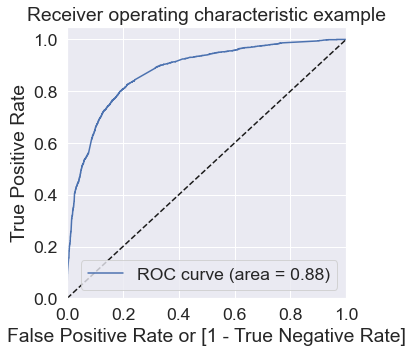

In [106]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

### Observations
1. From the above plot we could see our model ROC curve is far away from the diagonal which is exptected for a good model

### Step 14: Finding Optimal Cutoff Point

In [107]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Converted  Converted_Prob  LeadId  predicted  0.0  0.1  0.2  0.3  0.4  0.5  \
0          0        0.019386    5279          0    1    0    0    0    0    0   
1          0        0.362031    3099          0    1    1    1    1    0    0   
2          1        0.782688      91          1    1    1    1    1    1    1   
3          1        0.876579    1577          1    1    1    1    1    1    1   
4          0        0.155583     487          0    1    1    0    0    0    0   

   0.6  0.7  0.8  0.9  
0    0    0    0    0  
1    0    0    0    0  
2    1    1    0    0  
3    1    1    1    0  
4    0    0    0    0

In [108]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.375063  1.000000  0.000000
0.1   0.1  0.593808  0.967073  0.369789
0.2   0.2  0.743191  0.905728  0.645642
0.3   0.3  0.799019  0.826793  0.782350
0.4   0.4  0.810354  0.757781  0.841906
0.5   0.5  0.810692  0.679296  0.889551
0.6   0.6  0.787346  0.557961  0.925014
0.7   0.7  0.779394  0.494362  0.950460
0.8   0.8  0.760277  0.406405  0.972658
0.9   0.9  0.703773  0.229138  0.988630


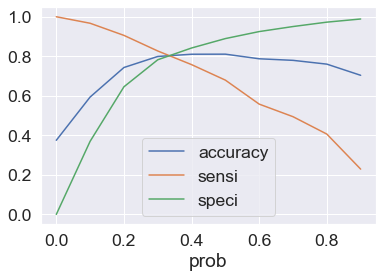

In [109]:
# Let's plot accuracy sensitivity and specificity for various probabilities.

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

### Observations
1. From the above plot we could see optimal cut off probability can be taken as 0.35

In [110]:
# Let us make the final prediction using 0.35 as the cut off based on above observation

y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.35 else 0)
y_train_pred_final.head()


Converted  Converted_Prob  LeadId  predicted  0.0  0.1  0.2  0.3  0.4  0.5  \
0          0        0.019386    5279          0    1    0    0    0    0    0   
1          0        0.362031    3099          0    1    1    1    1    0    0   
2          1        0.782688      91          1    1    1    1    1    1    1   
3          1        0.876579    1577          1    1    1    1    1    1    1   
4          0        0.155583     487          0    1    1    0    0    0    0   

   0.6  0.7  0.8  0.9  final_predicted  
0    0    0    0    0                0  
1    0    0    0    0                1  
2    1    1    0    0                1  
3    1    1    1    0                1  
4    0    0    0    0                0

### Step 15 : Calculating Lead Score

In [111]:
# Now let us calculate the lead score

y_train_pred_final['lead_score'] = y_train_pred_final.Converted_Prob.map(lambda x: round(x*100))


#displaying the 10 rows with the calculated Lead_score column highlighted
def highlight_cols(s):
    color = 'yellow'
    return 'background-color: %s' % color

y_train_pred_final.head(10).style.applymap(highlight_cols, subset=pd.IndexSlice[:, ['lead_score']])

In [112]:
# checking if 80% cases are correctly predicted based on the converted column.

# get the total of final predicted conversion / non conversion counts from the actual converted rates

checking_df = y_train_pred_final.loc[y_train_pred_final['Converted']==1,['Converted','final_predicted']]
checking_df['final_predicted'].value_counts()

1    1765
0     452
Name: final_predicted, dtype: int64

In [113]:
# check the precentage of final_predicted conversions

print(1766/float(1766+451))

final_conversion_percent=round(1766/float(1766+451)*100)

        
print('Precentage of final_predicted conversions:= ',final_conversion_percent,'%')      

0.7965719440685611
Precentage of final_predicted conversions:=  80 %


### Observation
Hence we can see that our model, final prediction of conversions approximately around 80% (79.7%). Which is the conversion as per the X Educations CEO's requirement . Hence this is a good model.

### Step 16 :  Re Evaluating Metrics 
#### Accuracy, Confusion Metrics, Sensitivity, Specificity, False Postive Rate, Positive Predictive Value, Negative Predicitive Value  on final prediction on train set

In [114]:
# Let's check the overall accuracy.

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8061241752664524

In [115]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3000,  694],
       [ 452, 1765]], dtype=int64)

In [116]:
#ssigning from the confusion matrix
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [117]:
# Let's see the sensitivity of our logistic regression model

TP / float(TP+FN)

0.7961208840775823

In [118]:
# Let us calculate specificity

TN / float(TN+FP)

0.8121277747698972

In [119]:
# Calculate false postive rate - predicting conversions when leads has not converted

print(FP/ float(TN+FP))

0.18787222523010286


In [120]:
# Positive predictive value 

print (TP / float(TP+FP))

0.7177714518096787


In [121]:
# Negative predictive value

print (TN / float(TN+ FN))

0.8690614136732329


### Observation
Hence we can see that our model, final prediction of conversions approximately around 80% (79.7%). Also the sensitivity metric is approximately around 80%.

### Step 17 : Making predictions on the test set

In [122]:
X_test[['TotalVisits','Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits',
                                                                        'Total Time Spent on Website']])

In [123]:
X_test = X_test[col]
X_test.head()

Do Not Email  Total Time Spent on Website  \
1926             0                    -0.865647   
5654             0                    -0.865647   
1209             0                    -0.482236   
5234             0                    -0.084007   
8497             0                    -0.476679   

      Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
1926                                    0                          0   
5654                                    0                          0   
1209                                    1                          0   
5234                                    1                          0   
8497                                    1                          0   

      Lead Origin_Lead Import  Lead Source_Google  Lead Source_Olark Chat  \
1926                        0                   0                       1   
5654                        0                   0                       1   
1209                        0                   0                       0   
5234                        0                   0                       0   
8497                        0                   0                       0   

      Last Activity_Email Opened  Last Activity_Olark Chat Conversation  \
1926                           1                                      0   
5654                           0                                      1   
1209                           1                                      0   
5234                           1                                      0   
8497                           1                                      0   

      Last Activity_Others  \
1926                     0   
5654                     0   
1209                     0   
5234                     0   
8497                     0   

      What is your current occupation_Working Professional  \
1926                                                  1      
5654                                                  1      
1209                                                  1      
5234                                                  0      
8497                                                  0      

      Last Notable Activity_Others  Last Notable Activity_SMS Sent  
1926                             0                               0  
5654                             0                               0  
1209                             0                               0  
5234                             0                               0  
8497                             0                               0

In [124]:
X_test_sm = sm.add_constant(X_test)
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

1926    0.821258
5654    0.444768
1209    0.640751
5234    0.175498
8497    0.122355
1918    0.077377
7405    0.328657
6561    0.049576
5492    0.830220
7851    0.987057
dtype: float64

In [125]:
# Converting y_pred to a dataframe which is an array

y_pred_1 = pd.DataFrame(y_test_pred)

In [126]:
# Let's see the head

y_pred_1.head()

0
1926  0.821258
5654  0.444768
1209  0.640751
5234  0.175498
8497  0.122355

In [127]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [128]:
# Putting LeadId to index

y_test_df['LeadId'] = y_test_df.index

In [129]:
# Removing index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [130]:
# Appending y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [131]:
y_pred_final.head()

Converted  LeadId         0
0          1    1926  0.821258
1          0    5654  0.444768
2          0    1209  0.640751
3          0    5234  0.175498
4          0    8497  0.122355

In [132]:
# Renaming the column 

y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [133]:
# Rearranging the columns

y_pred_final = y_pred_final.reindex(['LeadId','Converted','Converted_Prob'], axis=1)

In [134]:
y_pred_final.head()

LeadId  Converted  Converted_Prob
0    1926          1        0.821258
1    5654          0        0.444768
2    1209          0        0.640751
3    5234          0        0.175498
4    8497          0        0.122355

In [135]:
# Based on cut off threshold using accuracy, sensitivity and specificity of 0.35%

y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.35 else 0)

In [136]:
y_pred_final.head()

LeadId  Converted  Converted_Prob  final_predicted
0    1926          1        0.821258                1
1    5654          0        0.444768                1
2    1209          0        0.640751                1
3    5234          0        0.175498                0
4    8497          0        0.122355                0

In [137]:
# Now let us calculate the lead score

y_pred_final['lead_score'] = y_pred_final.Converted_Prob.map(lambda x: round(x*100))

#displaying the 20 rows with the calculated Lead_score column highlighted
def highlight_cols(s):
    color = 'yellow'
    return 'background-color: %s' % color

y_pred_final.head(20).style.applymap(highlight_cols, subset=pd.IndexSlice[:, ['lead_score']])

In [138]:
# checking if 80% cases are correctly predicted based on the converted column.

# get the total of final predicted conversion or non conversion counts from the actual converted rates

checking_test_df = y_pred_final.loc[y_pred_final['Converted']==1,['Converted','final_predicted']]
checking_test_df['final_predicted'].value_counts()

1    776
0    172
Name: final_predicted, dtype: int64

In [139]:
# check the precentage of final_predicted conversions on test data

776/float(776+172)

0.8185654008438819

### Observation 
We can see that the final prediction of conversions have a target rate of 81%  required by the X Educations CEO's requirement . Hence this is a stable model required.

### Overall Evaluation Metrics - Accuracy, Confusion Metrics, Sensitivity, Specificity  on test set

In [140]:
# Let's check the accuracy.

metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8161010260457774

In [141]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1292,  294],
       [ 172,  776]], dtype=int64)

In [142]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [143]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8185654008438819

In [144]:
# Let us calculate specificity
TN / float(TN+FP)

0.8146279949558638

### Observation 
  We can see that the sensitivity percentage is around 81% and specificity are around 81%

### Conclusion

- While we have checked both Sensitivity-Specificity, we have considered the optimal cut off threshold around 0.35 based on   
  Sensitivity and Specificity for calculating the final prediction.
- Accuracy, Sensitivity and Specificity values of test set are around 81%, 81% and 81% which are approximately closer to the   
  respective values calculated using trained set.
- Hence overall this model seems to be good with final prediction of conversions have a target rate of 81% required by the X   
  Educations CEO's requirement.  
- Company can find the potential converting leads in case of lead origin is from “Lead Add Form”
- Company can find potential converting leads  who are working potentials.
- People with notable activity as “SMS Sent” are having higher chances for converting.
- Following Last Activity like : Had a Phone Conversation,Approached-upfront,View-in browser link Clicked,Email    
  Received,Resubscribed to emails,Visited Booth in Tradeshow has higher chance of convertion.
- The following variables has negative effect on lead convertion: DO Not Email, Last Activity Olark Chat Conversation, lead  
  origin from Landing Page Submission
